# Project Title: "Decoding the Optimal Trading Day: A Data-Driven Journey into Nifty50's Market Secrets"

## DATA PREPROCESSING

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 

### Loading Data

In [2]:
df = pd.read_excel("Nifty50_data.xlsx")
df

,Date,Price,Open,High,Low,Volume,Chg%
0,"Dec 29, 2023",21731.40,21737.65,21770.30,21676.90,270.92B,-0.0022
1,"Dec 28, 2023",21778.70,21715.00,21801.45,21678.00,393.08B,0.0057
2,"Dec 27, 2023",21654.75,21497.65,21675.75,21495.80,256.54B,0.0100
3,"Dec 26, 2023",21441.35,21365.20,21477.15,21329.45,219.47B,0.0043
4,"Dec 22, 2023",21349.40,21295.85,21390.50,21232.45,284.71B,0.0044
...,...,...,...,...,...,...,...
2223,"Jan 07, 2015",8102.10,8118.65,8151.20,8065.45,164.07B,-0.0031
2224,"Jan 06, 2015",8127.35,8325.30,8327.85,8111.35,172.80B,-0.0300
2225,"Jan 05, 2015",8378.40,8407.95,8445.60,8363.90,118.16B,-0.0020
2226,"Jan 02, 2015",8395.45,8288.70,8410.60,8288.70,101.89B,0.0135


### Initial Data Inspection

In [3]:
df = df.iloc[::-1]
df

,Date,Price,Open,High,Low,Volume,Chg%
2227,"Jan 01, 2015",8284.00,8272.80,8294.70,8248.75,56.56B,0.0002
2226,"Jan 02, 2015",8395.45,8288.70,8410.60,8288.70,101.89B,0.0135
2225,"Jan 05, 2015",8378.40,8407.95,8445.60,8363.90,118.16B,-0.0020
2224,"Jan 06, 2015",8127.35,8325.30,8327.85,8111.35,172.80B,-0.0300
2223,"Jan 07, 2015",8102.10,8118.65,8151.20,8065.45,164.07B,-0.0031
...,...,...,...,...,...,...,...
4,"Dec 22, 2023",21349.40,21295.85,21390.50,21232.45,284.71B,0.0044
3,"Dec 26, 2023",21441.35,21365.20,21477.15,21329.45,219.47B,0.0043
2,"Dec 27, 2023",21654.75,21497.65,21675.75,21495.80,256.54B,0.0100
1,"Dec 28, 2023",21778.70,21715.00,21801.45,21678.00,393.08B,0.0057


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 2227 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2228 non-null   object 
 1   Price   2228 non-null   float64
 2   Open    2228 non-null   float64
 3   High    2228 non-null   float64
 4   Low     2228 non-null   float64
 5   Volume  2228 non-null   object 
 6   Chg%    2228 non-null   float64
dtypes: float64(5), object(2)
memory usage: 122.0+ KB


In [5]:
df.rename(columns={"Price":"Close"},inplace=True)

In [6]:
df.isna().sum()

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

### Handling "Volume" and "Date" Column

**VOLUME**

In [7]:
def conv(s):
    s = str(s).replace(',', '') 
    if 'B' in str(s):
        return float(str(s).replace('B','')) * 1000000000
    elif'M' in str(s):
        return float(str(s).replace('M', '')) * 1000000
    elif 'K' in str(s):
        return float(str(s).replace('K', '')) * 1000
    else:
        return np.nan

In [8]:
df["Volume"] = df["Volume"].apply(conv)

In [9]:
df.head()

,Date,Close,Open,High,Low,Volume,Chg%
2227,"Jan 01, 2015",8284.00,8272.80,8294.70,8248.75,5.656000e+10,0.0002
2226,"Jan 02, 2015",8395.45,8288.70,8410.60,8288.70,1.018900e+11,0.0135
2225,"Jan 05, 2015",8378.40,8407.95,8445.60,8363.90,1.181600e+11,-0.0020
2224,"Jan 06, 2015",8127.35,8325.30,8327.85,8111.35,1.728000e+11,-0.0300
2223,"Jan 07, 2015",8102.10,8118.65,8151.20,8065.45,1.640700e+11,-0.0031


In [10]:
df.isna().sum()

Date      0
Close     0
Open      0
High      0
Low       0
Volume    2
Chg%      0
dtype: int64

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.isna().sum()

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

**DATE**

In [13]:
def remove_comma(s):
    if "," in str(s):
        return str(s).replace(","," ")
    else:
        return s
    
df["Date"] = df["Date"].apply(remove_comma)

In [14]:
def split_month(date_str):
    months_dict = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
   }
    parts = date_str.split()
    if len(parts) == 3:
        month_name, day, year = parts
        for k, v in months_dict.items():
            if k in month_name:
                return f"{v}-{day}-{year}"
    return date_str

In [15]:
df["Date"] = df["Date"].apply(split_month)

In [16]:
def remove_last_char(input_string):
    if input_string.endswith(tuple("ABCDEFGHIJKLMNOPQRSTUVWXYZ")):
        return input_string[:-1]
    else:
        return input_string
    

In [17]:
def pass_column(df, column_name):
    df[column_name] = df[column_name].apply(remove_last_char)
    return df

pass_column(df, 'Date')

,Date,Close,Open,High,Low,Volume,Chg%
2227,1-01-2015,8284.00,8272.80,8294.70,8248.75,5.656000e+10,0.0002
2226,1-02-2015,8395.45,8288.70,8410.60,8288.70,1.018900e+11,0.0135
2225,1-05-2015,8378.40,8407.95,8445.60,8363.90,1.181600e+11,-0.0020
2224,1-06-2015,8127.35,8325.30,8327.85,8111.35,1.728000e+11,-0.0300
2223,1-07-2015,8102.10,8118.65,8151.20,8065.45,1.640700e+11,-0.0031
...,...,...,...,...,...,...,...
4,12-22-2023,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044
3,12-26-2023,21441.35,21365.20,21477.15,21329.45,2.194700e+11,0.0043
2,12-27-2023,21654.75,21497.65,21675.75,21495.80,2.565400e+11,0.0100
1,12-28-2023,21778.70,21715.00,21801.45,21678.00,3.930800e+11,0.0057


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 2227 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2226 non-null   datetime64[ns]
 1   Close   2226 non-null   float64       
 2   Open    2226 non-null   float64       
 3   High    2226 non-null   float64       
 4   Low     2226 non-null   float64       
 5   Volume  2226 non-null   float64       
 6   Chg%    2226 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 139.1 KB


In [20]:
# df.to_excel("Nifty50_preprocessed.xlsx")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2226 entries, 2227 to 0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2226 non-null   datetime64[ns]
 1   Close   2226 non-null   float64       
 2   Open    2226 non-null   float64       
 3   High    2226 non-null   float64       
 4   Low     2226 non-null   float64       
 5   Volume  2226 non-null   float64       
 6   Chg%    2226 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 139.1 KB


### Feature Correlation

In [22]:
df.corr() 

,Close,Open,High,Low,Volume,Chg%
Close,1.000000,0.999656,0.999836,0.999840,0.074578,0.029803
Open,0.999656,1.000000,0.999857,0.999805,0.075465,0.009757
High,0.999836,0.999857,1.000000,0.999741,0.079593,0.017874
Low,0.999840,0.999805,0.999741,1.000000,0.069467,0.021073
Volume,0.074578,0.075465,0.079593,0.069467,1.000000,-0.021612
Chg%,0.029803,0.009757,0.017874,0.021073,-0.021612,1.000000


**Nifty50 Trend**

<AxesSubplot:xlabel='Date', ylabel='Close'>

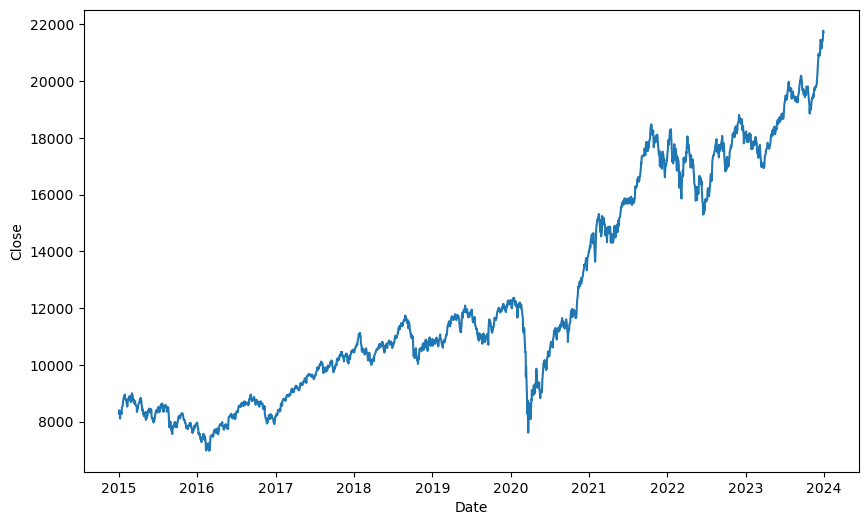

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['Date'], y=df['Close'])

### Segmentation of Data

SEGMENT1: 2015-2019

In [24]:
# 2015 - 2019
def segments(df):
    new_df = df[(df['Date'].dt.year >= 2015) & (df['Date'].dt.year <= 2019)]
    return new_df

segment1 = segments(df.copy())
segment1 = pd.DataFrame(segment1)
segment1

,Date,Close,Open,High,Low,Volume,Chg%
2227,2015-01-01,8284.00,8272.80,8294.70,8248.75,5.656000e+10,0.0002
2226,2015-01-02,8395.45,8288.70,8410.60,8288.70,1.018900e+11,0.0135
2225,2015-01-05,8378.40,8407.95,8445.60,8363.90,1.181600e+11,-0.0020
2224,2015-01-06,8127.35,8325.30,8327.85,8111.35,1.728000e+11,-0.0300
2223,2015-01-07,8102.10,8118.65,8151.20,8065.45,1.640700e+11,-0.0031
...,...,...,...,...,...,...,...
998,2019-12-24,12214.55,12269.25,12283.70,12202.10,4.702900e+11,-0.0039
997,2019-12-26,12126.55,12211.85,12221.55,12118.85,5.203300e+11,-0.0072
996,2019-12-27,12245.80,12172.90,12258.45,12157.90,3.837900e+11,0.0098
995,2019-12-30,12255.85,12274.90,12286.45,12213.80,4.110900e+11,0.0008


SEGMENT2 : 2020

In [25]:
# 2020 
def segments(df):
    new_df = df[(df['Date'].dt.year == 2020)]
    return new_df

segment2 = segments(df.copy())
segment2 = pd.DataFrame(segment2)
segment2

,Date,Close,Open,High,Low,Volume,Chg%
993,2020-01-01,12182.50,12202.15,12222.20,12165.30,3.040800e+11,0.0012
992,2020-01-02,12282.20,12198.55,12289.90,12195.25,4.077000e+11,0.0082
991,2020-01-03,12226.65,12261.10,12265.60,12191.35,4.287700e+11,-0.0045
990,2020-01-06,11993.05,12170.60,12179.10,11974.20,3.965000e+11,-0.0191
989,2020-01-07,12052.95,12079.10,12152.15,12005.35,4.478200e+11,0.0050
...,...,...,...,...,...,...,...
746,2020-12-24,13749.25,13672.15,13771.75,13626.90,4.713700e+11,0.0109
745,2020-12-28,13873.20,13815.15,13885.30,13811.55,4.036300e+11,0.0090
744,2020-12-29,13932.60,13910.35,13967.60,13859.90,4.395900e+11,0.0043
743,2020-12-30,13981.95,13980.90,13997.00,13864.95,3.806800e+11,0.0035


SEGMENT3 : 2021-2023

In [26]:
def segments(df):
    new_df = df[(df['Date'].dt.year >= 2021)]
    return new_df

segment3 = segments(df.copy())
segment3 = pd.DataFrame(segment3)
segment3

,Date,Close,Open,High,Low,Volume,Chg%
741,2021-01-01,14018.50,13996.10,14049.85,13991.35,2.580900e+11,0.0026
740,2021-01-04,14132.90,14104.35,14147.95,13953.75,4.950000e+11,0.0082
739,2021-01-05,14199.50,14075.15,14215.60,14048.15,4.924800e+11,0.0047
738,2021-01-06,14146.25,14240.95,14244.15,14039.90,6.323200e+11,-0.0038
737,2021-01-07,14137.35,14253.75,14256.25,14123.10,5.591700e+11,-0.0006
...,...,...,...,...,...,...,...
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044
3,2023-12-26,21441.35,21365.20,21477.15,21329.45,2.194700e+11,0.0043
2,2023-12-27,21654.75,21497.65,21675.75,21495.80,2.565400e+11,0.0100
1,2023-12-28,21778.70,21715.00,21801.45,21678.00,3.930800e+11,0.0057


**Line plot of 2020 (Pandemic year)**

<AxesSubplot:xlabel='Date', ylabel='Close'>

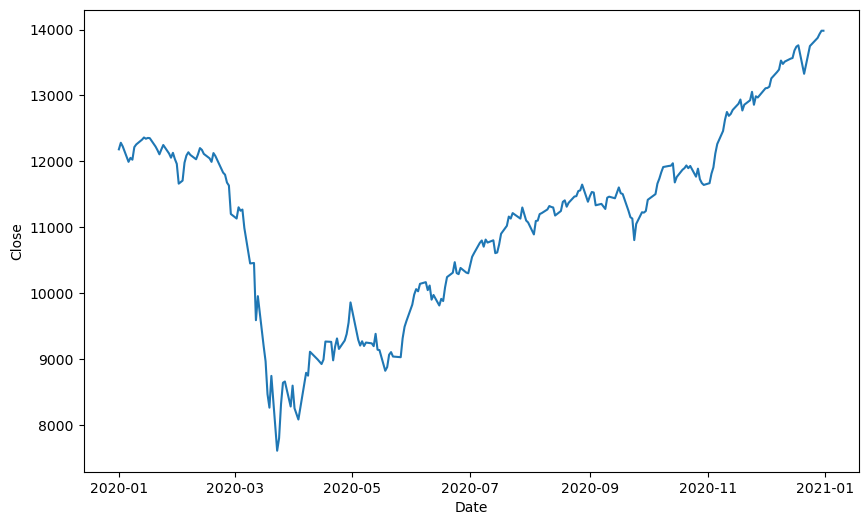

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(x=segment2['Date'], y=segment2['Close'])

**Line plot(After pandemic)**

<AxesSubplot:xlabel='Date', ylabel='Close'>

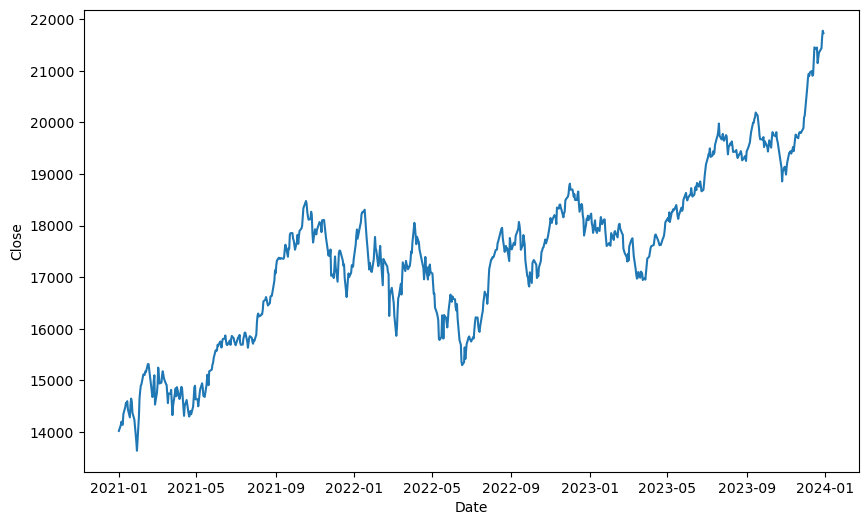

In [28]:
plt.figure(figsize=(10,6))
sns.lineplot(x=segment3['Date'], y=segment3['Close'])

### Adding "Day" column in data

**Day-wise data from 2015 to 2019**

In [29]:
segment1['Day'] = segment1['Date'].dt.dayofweek

In [30]:
segment1

,Date,Close,Open,High,Low,Volume,Chg%,Day
2227,2015-01-01,8284.00,8272.80,8294.70,8248.75,5.656000e+10,0.0002,3
2226,2015-01-02,8395.45,8288.70,8410.60,8288.70,1.018900e+11,0.0135,4
2225,2015-01-05,8378.40,8407.95,8445.60,8363.90,1.181600e+11,-0.0020,0
2224,2015-01-06,8127.35,8325.30,8327.85,8111.35,1.728000e+11,-0.0300,1
2223,2015-01-07,8102.10,8118.65,8151.20,8065.45,1.640700e+11,-0.0031,2
...,...,...,...,...,...,...,...,...
998,2019-12-24,12214.55,12269.25,12283.70,12202.10,4.702900e+11,-0.0039,1
997,2019-12-26,12126.55,12211.85,12221.55,12118.85,5.203300e+11,-0.0072,3
996,2019-12-27,12245.80,12172.90,12258.45,12157.90,3.837900e+11,0.0098,4
995,2019-12-30,12255.85,12274.90,12286.45,12213.80,4.110900e+11,0.0008,0


In [31]:
def split_monday(df):
    monday_df = segment1[(segment1['Day'] == 0)]
    return monday_df

segment1_monday = split_monday(df.copy())

In [32]:
segment1_monday

,Date,Close,Open,High,Low,Volume,Chg%,Day
2225,2015-01-05,8378.40,8407.95,8445.60,8363.90,1.181600e+11,-0.0020,0
2220,2015-01-12,8323.00,8291.35,8332.60,8245.60,1.031500e+11,0.0046,0
2215,2015-01-19,8550.70,8550.05,8570.95,8531.50,1.293500e+11,0.0043,0
2206,2015-02-02,8797.40,8802.50,8840.80,8751.10,2.165600e+11,-0.0013,0
2201,2015-02-09,8526.35,8584.40,8605.55,8516.35,1.513300e+11,-0.0156,0
...,...,...,...,...,...,...,...,...
1014,2019-12-02,12048.20,12137.05,12137.15,12023.70,7.209500e+11,-0.0007,0
1009,2019-12-09,11937.50,11939.10,11981.95,11888.05,5.991200e+11,0.0013,0
1004,2019-12-16,12053.95,12131.35,12134.65,12046.30,4.377000e+11,-0.0027,0
999,2019-12-23,12262.75,12235.45,12287.15,12213.25,6.047800e+11,-0.0007,0


In [33]:
def split_tuesday(df):
    tuesday_df = segment1[(segment1['Day'] == 1)]
    return tuesday_df
segment1_tuesday = split_tuesday(df.copy())
segment1_tuesday 

,Date,Close,Open,High,Low,Volume,Chg%,Day
2224,2015-01-06,8127.35,8325.30,8327.85,8111.35,1.728000e+11,-0.0300,1
2219,2015-01-13,8299.40,8346.15,8356.65,8267.90,1.295600e+11,-0.0028,1
2214,2015-01-20,8695.60,8575.10,8707.90,8574.50,1.587100e+11,0.0169,1
2210,2015-01-27,8910.50,8871.35,8925.05,8825.45,1.920100e+11,0.0085,1
2205,2015-02-03,8756.55,8823.15,8837.30,8726.65,2.086700e+11,-0.0046,1
...,...,...,...,...,...,...,...,...
1013,2019-12-03,11994.20,12067.65,12068.60,11956.40,6.057900e+11,-0.0045,1
1008,2019-12-10,11856.80,11950.50,11953.20,11844.70,6.502200e+11,-0.0068,1
1003,2019-12-17,12165.00,12082.45,12182.75,12070.35,4.995900e+11,0.0092,1
998,2019-12-24,12214.55,12269.25,12283.70,12202.10,4.702900e+11,-0.0039,1


In [34]:
def split_wednesday(df):
    wednesday_df = segment1[(segment1['Day'] == 2)]
    return wednesday_df
segment1_wednesday = split_wednesday(df.copy())
segment1_wednesday

,Date,Close,Open,High,Low,Volume,Chg%,Day
2223,2015-01-07,8102.10,8118.65,8151.20,8065.45,1.640700e+11,-0.0031,2
2218,2015-01-14,8277.55,8307.25,8326.45,8236.65,1.506200e+11,-0.0026,2
2213,2015-01-21,8729.50,8719.65,8741.85,8689.60,1.916500e+11,0.0039,2
2209,2015-01-28,8914.30,8902.75,8985.05,8874.05,1.908100e+11,0.0004,2
2204,2015-02-04,8723.70,8789.15,8792.85,8704.40,2.012500e+11,-0.0038,2
...,...,...,...,...,...,...,...,...
1022,2019-11-20,11999.10,12004.75,12038.60,11966.05,6.466600e+11,0.0049,2
1017,2019-11-27,12100.70,12068.50,12114.90,12055.15,5.842300e+11,0.0052,2
1012,2019-12-04,12043.20,11969.95,12054.70,11935.30,7.471900e+11,0.0041,2
1007,2019-12-11,11910.15,11867.35,11923.20,11832.30,9.976500e+11,0.0045,2


In [35]:
def split_thursday(df):
    thursday_df = segment1[(segment1['Day'] == 3)]
    return thursday_df
segment1_thursday = split_thursday(df.copy())
segment1_thursday

,Date,Close,Open,High,Low,Volume,Chg%,Day
2227,2015-01-01,8284.00,8272.80,8294.70,8248.75,5.656000e+10,0.0002,3
2222,2015-01-08,8234.60,8191.40,8243.50,8167.30,1.438000e+11,0.0164,3
2217,2015-01-15,8494.15,8424.50,8527.10,8380.55,2.321400e+11,0.0262,3
2212,2015-01-22,8761.40,8745.85,8774.15,8727.00,1.809100e+11,0.0037,3
2208,2015-01-29,8952.35,8901.50,8966.65,8861.25,2.642500e+11,0.0043,3
...,...,...,...,...,...,...,...,...
1016,2019-11-28,12151.15,12132.10,12158.80,12099.95,6.204800e+11,0.0042,3
1011,2019-12-05,12018.40,12071.25,12081.20,11998.75,5.622300e+11,-0.0021,3
1006,2019-12-12,11971.80,11944.30,12005.50,11934.00,7.526200e+11,0.0052,3
1001,2019-12-19,12259.70,12223.40,12268.35,12191.15,6.230500e+11,0.0031,3


In [36]:
def split_friday(df):
    friday_df = segment1[(segment1['Day'] == 4)]
    return friday_df
segment1_friday = split_friday(df.copy())
segment1_friday

,Date,Close,Open,High,Low,Volume,Chg%,Day
2226,2015-01-02,8395.45,8288.70,8410.60,8288.70,1.018900e+11,0.0135,4
2221,2015-01-09,8284.50,8285.45,8303.30,8190.80,1.526100e+11,0.0061,4
2216,2015-01-16,8513.80,8504.05,8530.75,8452.25,1.813700e+11,0.0023,4
2211,2015-01-23,8835.60,8827.95,8866.40,8795.40,1.971200e+11,0.0085,4
2207,2015-01-30,8808.90,8996.60,8996.60,8775.10,2.755900e+11,-0.0160,4
...,...,...,...,...,...,...,...,...
1015,2019-11-29,12056.05,12146.20,12147.40,12017.40,8.044300e+11,-0.0078,4
1010,2019-12-06,11921.50,12047.35,12057.05,11888.85,6.092200e+11,-0.0081,4
1005,2019-12-13,12086.70,12026.40,12098.85,12023.60,5.977100e+11,0.0096,4
1000,2019-12-20,12271.80,12266.45,12293.90,12252.75,8.106800e+11,0.0010,4


**Day-wise data of 2020**

In [37]:
segment2['Day'] = segment2['Date'].dt.dayofweek

In [38]:
segment2

,Date,Close,Open,High,Low,Volume,Chg%,Day
993,2020-01-01,12182.50,12202.15,12222.20,12165.30,3.040800e+11,0.0012,2
992,2020-01-02,12282.20,12198.55,12289.90,12195.25,4.077000e+11,0.0082,3
991,2020-01-03,12226.65,12261.10,12265.60,12191.35,4.287700e+11,-0.0045,4
990,2020-01-06,11993.05,12170.60,12179.10,11974.20,3.965000e+11,-0.0191,0
989,2020-01-07,12052.95,12079.10,12152.15,12005.35,4.478200e+11,0.0050,1
...,...,...,...,...,...,...,...,...
746,2020-12-24,13749.25,13672.15,13771.75,13626.90,4.713700e+11,0.0109,3
745,2020-12-28,13873.20,13815.15,13885.30,13811.55,4.036300e+11,0.0090,0
744,2020-12-29,13932.60,13910.35,13967.60,13859.90,4.395900e+11,0.0043,1
743,2020-12-30,13981.95,13980.90,13997.00,13864.95,3.806800e+11,0.0035,2


In [39]:
def split_monday(df):
    monday_df = segment2[(segment2['Day'] == 0)]
    return monday_df

segment2_monday = split_monday(df.copy())

In [40]:
segment2_monday.shape

(48, 8)

In [41]:
def split_tuesday(df):
    tuesday_df = segment2[(segment2['Day'] == 1)]
    return tuesday_df
segment2_tuesday = split_tuesday(df.copy())

In [42]:
segment2_tuesday.shape

(50, 8)

In [43]:
def split_wednesday(df):
    wednesday_df = segment2[(segment2['Day'] == 2)]
    return wednesday_df
segment2_wednesday = split_wednesday(df.copy())

In [44]:
segment2_wednesday.shape

(53, 8)

In [45]:
def split_thursday(df):
    thursday_df = segment2[(segment2['Day'] == 3)]
    return thursday_df
segment2_thursday = split_thursday(df.copy())

In [46]:
segment2_thursday.shape

(52, 8)

In [47]:
def split_friday(df):
    friday_df = segment2[(segment2['Day'] == 4)]
    return friday_df
segment2_friday = split_friday(df.copy())

In [48]:
segment2_friday.shape

(47, 8)

**Day wise data from 2021 to 2023**

In [49]:
segment3['Day'] = segment3['Date'].dt.dayofweek

In [50]:
segment3

,Date,Close,Open,High,Low,Volume,Chg%,Day
741,2021-01-01,14018.50,13996.10,14049.85,13991.35,2.580900e+11,0.0026,4
740,2021-01-04,14132.90,14104.35,14147.95,13953.75,4.950000e+11,0.0082,0
739,2021-01-05,14199.50,14075.15,14215.60,14048.15,4.924800e+11,0.0047,1
738,2021-01-06,14146.25,14240.95,14244.15,14039.90,6.323200e+11,-0.0038,2
737,2021-01-07,14137.35,14253.75,14256.25,14123.10,5.591700e+11,-0.0006,3
...,...,...,...,...,...,...,...,...
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4
3,2023-12-26,21441.35,21365.20,21477.15,21329.45,2.194700e+11,0.0043,1
2,2023-12-27,21654.75,21497.65,21675.75,21495.80,2.565400e+11,0.0100,2
1,2023-12-28,21778.70,21715.00,21801.45,21678.00,3.930800e+11,0.0057,3


In [51]:
def split_monday(df):
    monday_df = segment3[(segment3['Day'] == 0)]
    return monday_df

segment3_monday = split_monday(df.copy())

In [52]:
segment3_monday.shape

(150, 8)

In [53]:
def split_tuesday(df):
    tuesday_df = segment3[(segment3['Day'] == 1)]
    return tuesday_df

segment3_tuesday = split_tuesday(df.copy())
segment3_tuesday

,Date,Close,Open,High,Low,Volume,Chg%,Day
739,2021-01-05,14199.50,14075.15,14215.60,14048.15,4.924800e+11,0.0047,1
734,2021-01-12,14563.45,14473.80,14590.65,14432.85,9.295700e+11,0.0054,1
729,2021-01-19,14521.15,14371.65,14546.05,14350.85,5.461100e+11,0.0168,1
720,2021-02-02,14647.85,14481.10,14731.70,14469.15,9.149700e+11,0.0257,1
715,2021-02-09,15109.30,15164.15,15257.10,15064.30,7.132800e+11,-0.0004,1
...,...,...,...,...,...,...,...,...
22,2023-11-28,19889.70,19844.65,19916.85,19800.00,2.296000e+11,0.0048,1
17,2023-12-05,20855.10,20808.90,20864.05,20711.15,4.210100e+11,0.0081,1
12,2023-12-12,20906.40,21018.55,21037.90,20867.15,2.448700e+11,-0.0043,1
7,2023-12-19,21453.10,21477.65,21505.05,21337.75,2.497500e+11,0.0016,1


In [54]:
def split_wednesday(df):
    wednesday_df = segment3[(segment3['Day'] == 2)]
    return wednesday_df

segment3_wednesday = split_wednesday(df.copy())
segment3_wednesday

,Date,Close,Open,High,Low,Volume,Chg%,Day
738,2021-01-06,14146.25,14240.95,14244.15,14039.90,6.323200e+11,-0.0038,2
733,2021-01-13,14564.85,14639.80,14653.35,14435.70,8.739600e+11,0.0001,2
728,2021-01-20,14644.70,14538.30,14666.45,14517.55,6.230700e+11,0.0085,2
724,2021-01-27,13967.50,14237.95,14237.95,13929.30,6.607100e+11,-0.0191,2
719,2021-02-03,14789.95,14754.90,14868.85,14574.15,8.694800e+11,0.0097,2
...,...,...,...,...,...,...,...,...
21,2023-11-29,20096.60,19976.55,20104.65,19956.30,2.362400e+11,0.0104,2
16,2023-12-06,20937.70,20950.75,20961.95,20852.15,3.592100e+11,0.0040,2
11,2023-12-13,20926.35,20929.75,20950.00,20769.50,2.602700e+11,0.0010,2
6,2023-12-20,21150.15,21543.50,21593.00,21087.35,3.638900e+11,-0.0141,2


In [55]:
def split_thursday(df):
    thursday_df = segment3[(segment3['Day'] == 3)]
    return thursday_df

segment3_thursday = split_thursday(df.copy())
segment3_thursday

,Date,Close,Open,High,Low,Volume,Chg%,Day
737,2021-01-07,14137.35,14253.75,14256.25,14123.10,5.591700e+11,-0.0006,3
732,2021-01-14,14595.60,14550.05,14617.80,14471.50,6.201900e+11,0.0021,3
727,2021-01-21,14590.35,14730.95,14753.55,14517.25,7.046500e+11,-0.0037,3
723,2021-01-28,13817.55,13810.40,13898.25,13713.25,6.378700e+11,-0.0107,3
718,2021-02-04,14895.65,14789.05,14913.70,14714.75,8.846900e+11,0.0071,3
...,...,...,...,...,...,...,...,...
20,2023-11-30,20133.15,20108.50,20158.70,20015.85,4.865900e+11,0.0018,3
15,2023-12-07,20901.15,20932.40,20941.25,20850.80,2.749900e+11,-0.0017,3
10,2023-12-14,21182.70,21110.40,21210.90,21074.45,3.344100e+11,0.0123,3
5,2023-12-21,21255.05,21033.95,21288.35,20976.80,2.775500e+11,0.0050,3


In [56]:
def split_friday(df):
    friday_df = segment3[(segment3['Day'] == 4)]
    return friday_df
segment3_friday = split_friday(df.copy())
segment3_friday

,Date,Close,Open,High,Low,Volume,Chg%,Day
741,2021-01-01,14018.50,13996.10,14049.85,13991.35,2.580900e+11,0.0026,4
736,2021-01-08,14347.25,14258.40,14367.30,14221.65,6.134700e+11,0.0148,4
731,2021-01-15,14433.70,14594.35,14617.45,14357.85,7.895600e+11,-0.0111,4
726,2021-01-22,14371.90,14583.40,14619.90,14357.75,7.767500e+11,-0.0150,4
722,2021-01-29,13634.60,13946.60,13966.85,13596.75,7.532100e+11,-0.0132,4
...,...,...,...,...,...,...,...,...
19,2023-12-01,20267.90,20194.10,20291.55,20183.70,2.658100e+11,0.0067,4
14,2023-12-08,20969.40,20934.10,21006.10,20862.70,2.924400e+11,0.0033,4
9,2023-12-15,21456.65,21287.45,21492.30,21235.30,5.087600e+11,0.0129,4
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4


### Percentage Change Calculation

**For Segment 1**

**Monday**

In [57]:
segment1_monday['Percentage_change'] = ((segment1_monday['Close'] - segment1_monday['Close'].shift(1)) / segment1_monday['Close'].shift(1))*100 

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\1062714408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment1_monday['Percentage_change'] = ((segment1_monday['Close'] - segment1_monday['Close'].shift(1)) / segment1_monday['Close'].shift(1))*100


In [58]:
segment1_monday 

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
2225,2015-01-05,8378.40,8407.95,8445.60,8363.90,1.181600e+11,-0.0020,0,NaN
2220,2015-01-12,8323.00,8291.35,8332.60,8245.60,1.031500e+11,0.0046,0,-0.661224
2215,2015-01-19,8550.70,8550.05,8570.95,8531.50,1.293500e+11,0.0043,0,2.735792
2206,2015-02-02,8797.40,8802.50,8840.80,8751.10,2.165600e+11,-0.0013,0,2.885144
2201,2015-02-09,8526.35,8584.40,8605.55,8516.35,1.513300e+11,-0.0156,0,-3.081024
...,...,...,...,...,...,...,...,...,...
1014,2019-12-02,12048.20,12137.05,12137.15,12023.70,7.209500e+11,-0.0007,0,-0.211616
1009,2019-12-09,11937.50,11939.10,11981.95,11888.05,5.991200e+11,0.0013,0,-0.918809
1004,2019-12-16,12053.95,12131.35,12134.65,12046.30,4.377000e+11,-0.0027,0,0.975497
999,2019-12-23,12262.75,12235.45,12287.15,12213.25,6.047800e+11,-0.0007,0,1.732212


**Tuesday**

In [59]:
segment1_tuesday['Percentage_change'] = ((segment1_tuesday['Close'] - segment1_tuesday['Close'].shift(1)) / segment1_tuesday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\3760192594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment1_tuesday['Percentage_change'] = ((segment1_tuesday['Close'] - segment1_tuesday['Close'].shift(1)) / segment1_tuesday['Close'].shift(1))*100


In [60]:
segment1_tuesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
2224,2015-01-06,8127.35,8325.30,8327.85,8111.35,1.728000e+11,-0.0300,1,NaN
2219,2015-01-13,8299.40,8346.15,8356.65,8267.90,1.295600e+11,-0.0028,1,2.116926
2214,2015-01-20,8695.60,8575.10,8707.90,8574.50,1.587100e+11,0.0169,1,4.773839
2210,2015-01-27,8910.50,8871.35,8925.05,8825.45,1.920100e+11,0.0085,1,2.471365
2205,2015-02-03,8756.55,8823.15,8837.30,8726.65,2.086700e+11,-0.0046,1,-1.727737
...,...,...,...,...,...,...,...,...,...
1013,2019-12-03,11994.20,12067.65,12068.60,11956.40,6.057900e+11,-0.0045,1,-0.361365
1008,2019-12-10,11856.80,11950.50,11953.20,11844.70,6.502200e+11,-0.0068,1,-1.145554
1003,2019-12-17,12165.00,12082.45,12182.75,12070.35,4.995900e+11,0.0092,1,2.599352
998,2019-12-24,12214.55,12269.25,12283.70,12202.10,4.702900e+11,-0.0039,1,0.407316


**Wednesday**

In [61]:
segment1_wednesday['Percentage_change'] = ((segment1_wednesday['Close'] - segment1_wednesday['Close'].shift(1)) / segment1_wednesday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\751974553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment1_wednesday['Percentage_change'] = ((segment1_wednesday['Close'] - segment1_wednesday['Close'].shift(1)) / segment1_wednesday['Close'].shift(1))*100


In [62]:
segment1_wednesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
2223,2015-01-07,8102.10,8118.65,8151.20,8065.45,1.640700e+11,-0.0031,2,NaN
2218,2015-01-14,8277.55,8307.25,8326.45,8236.65,1.506200e+11,-0.0026,2,2.165488
2213,2015-01-21,8729.50,8719.65,8741.85,8689.60,1.916500e+11,0.0039,2,5.459949
2209,2015-01-28,8914.30,8902.75,8985.05,8874.05,1.908100e+11,0.0004,2,2.116960
2204,2015-02-04,8723.70,8789.15,8792.85,8704.40,2.012500e+11,-0.0038,2,-2.138138
...,...,...,...,...,...,...,...,...,...
1022,2019-11-20,11999.10,12004.75,12038.60,11966.05,6.466600e+11,0.0049,2,1.339898
1017,2019-11-27,12100.70,12068.50,12114.90,12055.15,5.842300e+11,0.0052,2,0.846730
1012,2019-12-04,12043.20,11969.95,12054.70,11935.30,7.471900e+11,0.0041,2,-0.475179
1007,2019-12-11,11910.15,11867.35,11923.20,11832.30,9.976500e+11,0.0045,2,-1.104773


**Thursday**

In [63]:
segment1_thursday['Percentage_change'] = ((segment1_thursday['Close'] - segment1_thursday['Close'].shift(1)) / segment1_thursday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\1992044101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment1_thursday['Percentage_change'] = ((segment1_thursday['Close'] - segment1_thursday['Close'].shift(1)) / segment1_thursday['Close'].shift(1))*100


In [64]:
segment1_thursday 

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
2227,2015-01-01,8284.00,8272.80,8294.70,8248.75,5.656000e+10,0.0002,3,NaN
2222,2015-01-08,8234.60,8191.40,8243.50,8167.30,1.438000e+11,0.0164,3,-0.596330
2217,2015-01-15,8494.15,8424.50,8527.10,8380.55,2.321400e+11,0.0262,3,3.151944
2212,2015-01-22,8761.40,8745.85,8774.15,8727.00,1.809100e+11,0.0037,3,3.146283
2208,2015-01-29,8952.35,8901.50,8966.65,8861.25,2.642500e+11,0.0043,3,2.179446
...,...,...,...,...,...,...,...,...,...
1016,2019-11-28,12151.15,12132.10,12158.80,12099.95,6.204800e+11,0.0042,3,1.526938
1011,2019-12-05,12018.40,12071.25,12081.20,11998.75,5.622300e+11,-0.0021,3,-1.092489
1006,2019-12-12,11971.80,11944.30,12005.50,11934.00,7.526200e+11,0.0052,3,-0.387739
1001,2019-12-19,12259.70,12223.40,12268.35,12191.15,6.230500e+11,0.0031,3,2.404818


**Friday**

In [65]:
segment1_friday['Percentage_change'] = ((segment1_friday['Close'] - segment1_friday['Close'].shift(1)) / segment1_friday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\999988658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment1_friday['Percentage_change'] = ((segment1_friday['Close'] - segment1_friday['Close'].shift(1)) / segment1_friday['Close'].shift(1))*100


In [66]:
segment1_friday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
2226,2015-01-02,8395.45,8288.70,8410.60,8288.70,1.018900e+11,0.0135,4,NaN
2221,2015-01-09,8284.50,8285.45,8303.30,8190.80,1.526100e+11,0.0061,4,-1.321549
2216,2015-01-16,8513.80,8504.05,8530.75,8452.25,1.813700e+11,0.0023,4,2.767819
2211,2015-01-23,8835.60,8827.95,8866.40,8795.40,1.971200e+11,0.0085,4,3.779746
2207,2015-01-30,8808.90,8996.60,8996.60,8775.10,2.755900e+11,-0.0160,4,-0.302187
...,...,...,...,...,...,...,...,...,...
1015,2019-11-29,12056.05,12146.20,12147.40,12017.40,8.044300e+11,-0.0078,4,1.188897
1010,2019-12-06,11921.50,12047.35,12057.05,11888.85,6.092200e+11,-0.0081,4,-1.116037
1005,2019-12-13,12086.70,12026.40,12098.85,12023.60,5.977100e+11,0.0096,4,1.385732
1000,2019-12-20,12271.80,12266.45,12293.90,12252.75,8.106800e+11,0.0010,4,1.531435


**For Segment 2**

**Monday**

In [67]:
segment2_monday['Percentage_change'] = ((segment2_monday['Close'] - segment2_monday['Close'].shift(1)) / segment2_monday['Close'].shift(1))*100 

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\4121808608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment2_monday['Percentage_change'] = ((segment2_monday['Close'] - segment2_monday['Close'].shift(1)) / segment2_monday['Close'].shift(1))*100


In [68]:
segment2_monday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
990,2020-01-06,11993.05,12170.60,12179.10,11974.20,3.965000e+11,-0.0191,0,NaN
985,2020-01-13,12329.55,12296.70,12337.75,12285.80,5.009700e+11,0.0059,0,2.805792
980,2020-01-20,12224.55,12430.50,12430.50,12216.90,4.916100e+11,-0.0103,0,-0.851613
975,2020-01-27,12119.00,12197.10,12216.60,12107.00,4.411600e+11,-0.0106,0,-0.863426
969,2020-02-03,11707.90,11627.45,11749.85,11614.50,6.698200e+11,0.0039,0,-3.392194
964,2020-02-10,12031.50,12102.35,12103.55,11990.75,5.247100e+11,-0.0055,0,2.763946
959,2020-02-17,12045.80,12131.80,12159.60,12037.00,4.551900e+11,-0.0056,0,0.118855
955,2020-02-24,11829.40,12012.55,12012.55,11813.40,4.908000e+11,-0.0208,0,-1.796477
950,2020-03-02,11132.75,11387.35,11433.00,11036.25,6.808000e+11,-0.0062,0,-5.889141
945,2020-03-09,10451.45,10742.05,10751.55,10294.45,1.565510e+12,-0.0490,0,-6.119782


**Tuesday**

In [69]:
segment2_tuesday['Percentage_change'] = ((segment2_tuesday['Close'] - segment2_tuesday['Close'].shift(1)) / segment2_tuesday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\1580202567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment2_tuesday['Percentage_change'] = ((segment2_tuesday['Close'] - segment2_tuesday['Close'].shift(1)) / segment2_tuesday['Close'].shift(1))*100


In [70]:
segment2_tuesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
989,2020-01-07,12052.95,12079.10,12152.15,12005.35,4.478200e+11,0.0050,1,NaN
984,2020-01-14,12362.30,12333.10,12374.25,12308.70,6.162600e+11,0.0027,1,2.566592
979,2020-01-21,12169.85,12195.30,12230.05,12162.30,4.439800e+11,-0.0045,1,-1.556749
974,2020-01-28,12055.80,12148.10,12163.55,12024.50,4.784800e+11,-0.0052,1,-0.937152
968,2020-02-04,11979.65,11786.25,11986.15,11783.40,5.604300e+11,0.0232,1,-0.631646
963,2020-02-11,12107.90,12108.40,12172.30,12099.00,4.799800e+11,0.0064,1,1.070566
958,2020-02-18,11992.50,12028.25,12030.75,11908.05,6.768500e+11,-0.0044,1,-0.953097
954,2020-02-25,11797.90,11877.50,11883.05,11779.90,4.610000e+11,-0.0027,1,-1.622681
949,2020-03-03,11303.30,11217.55,11342.25,11152.55,6.965200e+11,0.0153,1,-4.192272
940,2020-03-17,8967.05,9285.40,9403.80,8915.60,9.356200e+11,-0.0250,1,-20.668743


**Wednesday**

In [71]:
segment2_wednesday['Percentage_change'] = ((segment2_wednesday['Close'] - segment2_wednesday['Close'].shift(1)) / segment2_wednesday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\3183827151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment2_wednesday['Percentage_change'] = ((segment2_wednesday['Close'] - segment2_wednesday['Close'].shift(1)) / segment2_wednesday['Close'].shift(1))*100


In [72]:
segment2_wednesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
993,2020-01-01,12182.50,12202.15,12222.20,12165.30,3.040800e+11,0.0012,2,NaN
988,2020-01-08,12025.35,11939.10,12044.95,11929.60,4.459900e+11,-0.0023,2,-1.289965
983,2020-01-15,12343.30,12349.40,12355.15,12278.75,6.843500e+11,-0.0015,2,2.643998
978,2020-01-22,12106.90,12218.35,12225.05,12087.90,5.263000e+11,-0.0052,2,-1.915209
973,2020-01-29,12129.50,12114.90,12169.60,12103.80,5.143600e+11,0.0061,2,0.186670
967,2020-02-05,12089.15,12005.85,12098.15,11953.35,7.580300e+11,0.0091,2,-0.332660
962,2020-02-12,12201.20,12151.00,12231.75,12144.30,4.117300e+11,0.0077,2,0.926864
957,2020-02-19,12125.90,12090.60,12134.70,12042.10,5.135700e+11,0.0111,2,-0.617152
953,2020-02-26,11678.50,11738.55,11783.25,11639.60,5.676200e+11,-0.0101,2,-3.689623
948,2020-03-04,11251.00,11351.35,11356.60,11082.15,7.976500e+11,-0.0046,2,-3.660573


**Thursday**

In [73]:
segment2_thursday['Percentage_change'] = ((segment2_thursday['Close'] - segment2_thursday['Close'].shift(1)) / segment2_thursday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\2541163012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment2_thursday['Percentage_change'] = ((segment2_thursday['Close'] - segment2_thursday['Close'].shift(1)) / segment2_thursday['Close'].shift(1))*100


In [74]:
segment2_thursday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
992,2020-01-02,12282.20,12198.55,12289.90,12195.25,4.077000e+11,0.0082,3,NaN
987,2020-01-09,12215.90,12153.15,12224.05,12132.55,4.774700e+11,0.0158,3,-0.539806
982,2020-01-16,12355.50,12347.10,12389.05,12315.80,3.956700e+11,0.0010,3,1.142773
977,2020-01-23,12180.35,12123.75,12189.00,12094.10,8.676500e+11,0.0061,3,-1.417587
972,2020-01-30,12035.80,12147.75,12150.30,12010.60,5.381400e+11,-0.0077,3,-1.186748
966,2020-02-06,12137.95,12120.00,12160.60,12084.65,5.651200e+11,0.0040,3,0.848718
961,2020-02-13,12174.65,12219.55,12225.65,12139.80,5.011900e+11,-0.0022,3,0.302357
956,2020-02-20,12080.85,12119.00,12152.00,12071.45,5.026000e+11,-0.0037,3,-0.770453
952,2020-02-27,11633.30,11661.25,11663.85,11536.70,6.086100e+11,-0.0039,3,-3.704623
947,2020-03-05,11269.00,11306.05,11389.50,11244.60,1.352490e+12,0.0016,3,-3.131528


**Friday**

In [75]:
segment2_friday['Percentage_change'] = ((segment2_friday['Close'] - segment2_friday['Close'].shift(1)) / segment2_friday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\400304480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment2_friday['Percentage_change'] = ((segment2_friday['Close'] - segment2_friday['Close'].shift(1)) / segment2_friday['Close'].shift(1))*100


In [76]:
segment2_friday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
991,2020-01-03,12226.65,12261.10,12265.60,12191.35,4.287700e+11,-0.0045,4,NaN
986,2020-01-10,12256.80,12271.00,12311.20,12213.20,6.606300e+11,0.0033,4,0.246592
981,2020-01-17,12352.35,12328.40,12385.45,12321.40,5.020600e+11,-0.0003,4,0.779567
976,2020-01-24,12248.25,12174.55,12272.15,12149.65,5.932400e+11,0.0056,4,-0.842755
971,2020-01-31,11962.10,12100.40,12103.55,11945.85,7.712800e+11,-0.0061,4,-2.336252
965,2020-02-07,12098.35,12151.15,12154.70,12073.95,4.734700e+11,-0.0033,4,1.139014
960,2020-02-14,12113.45,12190.15,12246.70,12091.20,6.227800e+11,-0.0050,4,0.124810
951,2020-02-28,11201.75,11382.00,11384.80,11175.05,8.099000e+11,-0.0371,4,-7.526345
946,2020-03-06,10989.45,10942.65,11035.10,10827.40,1.810970e+12,-0.0248,4,-1.895240
942,2020-03-13,9955.20,9107.60,10159.40,8555.15,1.387950e+12,0.0381,4,-9.411299


**For segment 3**

**Monday**

In [77]:
segment3_monday['Percentage_change'] = ((segment3_monday['Close'] - segment3_monday['Close'].shift(1)) / segment3_monday['Close'].shift(1))*100 

segment3_monday

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\2269357342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment3_monday['Percentage_change'] = ((segment3_monday['Close'] - segment3_monday['Close'].shift(1)) / segment3_monday['Close'].shift(1))*100


,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
740,2021-01-04,14132.90,14104.35,14147.95,13953.75,4.950000e+11,0.0082,0,NaN
735,2021-01-11,14484.75,14474.05,14498.20,14383.10,6.728800e+11,0.0096,0,2.489581
730,2021-01-18,14281.30,14453.30,14459.15,14222.80,7.620400e+11,-0.0106,0,-1.404581
725,2021-01-25,14238.90,14477.80,14491.10,14218.60,6.186300e+11,-0.0093,0,-0.296892
721,2021-02-01,14281.20,13758.60,14336.35,13661.75,8.705300e+11,0.0474,0,0.297074
...,...,...,...,...,...,...,...,...,...
31,2023-11-13,19443.55,19486.75,19494.40,19414.75,1.892800e+11,-0.0042,0,0.163818
27,2023-11-20,19694.00,19731.15,19756.45,19670.50,1.737800e+11,-0.0019,0,1.288088
18,2023-12-04,20686.80,20601.95,20702.65,20507.75,3.811100e+11,0.0207,0,5.041129
13,2023-12-11,20997.10,20965.30,21026.10,20923.70,2.129200e+11,0.0013,0,1.499990


**Tuesday**

In [78]:
segment3_tuesday['Percentage_change'] = ((segment3_tuesday['Close'] - segment3_tuesday['Close'].shift(1)) / segment3_tuesday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\938009027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment3_tuesday['Percentage_change'] = ((segment3_tuesday['Close'] - segment3_tuesday['Close'].shift(1)) / segment3_tuesday['Close'].shift(1))*100


In [79]:
segment3_tuesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
739,2021-01-05,14199.50,14075.15,14215.60,14048.15,4.924800e+11,0.0047,1,NaN
734,2021-01-12,14563.45,14473.80,14590.65,14432.85,9.295700e+11,0.0054,1,2.563118
729,2021-01-19,14521.15,14371.65,14546.05,14350.85,5.461100e+11,0.0168,1,-0.290453
720,2021-02-02,14647.85,14481.10,14731.70,14469.15,9.149700e+11,0.0257,1,0.872520
715,2021-02-09,15109.30,15164.15,15257.10,15064.30,7.132800e+11,-0.0004,1,3.150292
...,...,...,...,...,...,...,...,...,...
22,2023-11-28,19889.70,19844.65,19916.85,19800.00,2.296000e+11,0.0048,1,0.537319
17,2023-12-05,20855.10,20808.90,20864.05,20711.15,4.210100e+11,0.0081,1,4.853769
12,2023-12-12,20906.40,21018.55,21037.90,20867.15,2.448700e+11,-0.0043,1,0.245983
7,2023-12-19,21453.10,21477.65,21505.05,21337.75,2.497500e+11,0.0016,1,2.614989


**Wednesday**

In [80]:
segment3_wednesday['Percentage_change'] = ((segment3_wednesday['Close'] - segment3_wednesday['Close'].shift(1)) / segment3_wednesday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\1582773026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment3_wednesday['Percentage_change'] = ((segment3_wednesday['Close'] - segment3_wednesday['Close'].shift(1)) / segment3_wednesday['Close'].shift(1))*100


In [81]:
segment3_wednesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
738,2021-01-06,14146.25,14240.95,14244.15,14039.90,6.323200e+11,-0.0038,2,NaN
733,2021-01-13,14564.85,14639.80,14653.35,14435.70,8.739600e+11,0.0001,2,2.959088
728,2021-01-20,14644.70,14538.30,14666.45,14517.55,6.230700e+11,0.0085,2,0.548238
724,2021-01-27,13967.50,14237.95,14237.95,13929.30,6.607100e+11,-0.0191,2,-4.624199
719,2021-02-03,14789.95,14754.90,14868.85,14574.15,8.694800e+11,0.0097,2,5.888312
...,...,...,...,...,...,...,...,...,...
21,2023-11-29,20096.60,19976.55,20104.65,19956.30,2.362400e+11,0.0104,2,1.437271
16,2023-12-06,20937.70,20950.75,20961.95,20852.15,3.592100e+11,0.0040,2,4.185285
11,2023-12-13,20926.35,20929.75,20950.00,20769.50,2.602700e+11,0.0010,2,-0.054208
6,2023-12-20,21150.15,21543.50,21593.00,21087.35,3.638900e+11,-0.0141,2,1.069465


**Thursday**

In [82]:
segment3_thursday['Percentage_change'] = ((segment3_thursday['Close'] - segment3_thursday['Close'].shift(1)) / segment3_thursday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\161674230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment3_thursday['Percentage_change'] = ((segment3_thursday['Close'] - segment3_thursday['Close'].shift(1)) / segment3_thursday['Close'].shift(1))*100


In [83]:
segment3_thursday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
737,2021-01-07,14137.35,14253.75,14256.25,14123.10,5.591700e+11,-0.0006,3,NaN
732,2021-01-14,14595.60,14550.05,14617.80,14471.50,6.201900e+11,0.0021,3,3.241414
727,2021-01-21,14590.35,14730.95,14753.55,14517.25,7.046500e+11,-0.0037,3,-0.035970
723,2021-01-28,13817.55,13810.40,13898.25,13713.25,6.378700e+11,-0.0107,3,-5.296652
718,2021-02-04,14895.65,14789.05,14913.70,14714.75,8.846900e+11,0.0071,3,7.802396
...,...,...,...,...,...,...,...,...,...
20,2023-11-30,20133.15,20108.50,20158.70,20015.85,4.865900e+11,0.0018,3,1.672306
15,2023-12-07,20901.15,20932.40,20941.25,20850.80,2.749900e+11,-0.0017,3,3.814604
10,2023-12-14,21182.70,21110.40,21210.90,21074.45,3.344100e+11,0.0123,3,1.347055
5,2023-12-21,21255.05,21033.95,21288.35,20976.80,2.775500e+11,0.0050,3,0.341552


**Friday**

In [84]:
segment3_friday['Percentage_change'] = ((segment3_friday['Close'] - segment3_friday['Close'].shift(1)) / segment3_friday['Close'].shift(1))*100

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\2900576948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment3_friday['Percentage_change'] = ((segment3_friday['Close'] - segment3_friday['Close'].shift(1)) / segment3_friday['Close'].shift(1))*100


In [85]:
segment3_friday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
741,2021-01-01,14018.50,13996.10,14049.85,13991.35,2.580900e+11,0.0026,4,NaN
736,2021-01-08,14347.25,14258.40,14367.30,14221.65,6.134700e+11,0.0148,4,2.345115
731,2021-01-15,14433.70,14594.35,14617.45,14357.85,7.895600e+11,-0.0111,4,0.602554
726,2021-01-22,14371.90,14583.40,14619.90,14357.75,7.767500e+11,-0.0150,4,-0.428165
722,2021-01-29,13634.60,13946.60,13966.85,13596.75,7.532100e+11,-0.0132,4,-5.130150
...,...,...,...,...,...,...,...,...,...
19,2023-12-01,20267.90,20194.10,20291.55,20183.70,2.658100e+11,0.0067,4,2.390539
14,2023-12-08,20969.40,20934.10,21006.10,20862.70,2.924400e+11,0.0033,4,3.461138
9,2023-12-15,21456.65,21287.45,21492.30,21235.30,5.087600e+11,0.0129,4,2.323624
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845


### Outlier Detection and Removal

**For monday**

<AxesSubplot:xlabel='Percentage_change'>

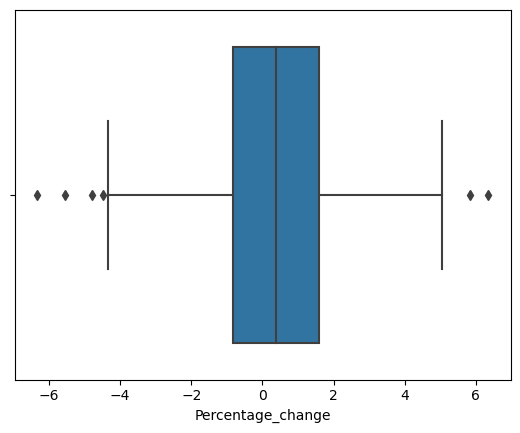

In [86]:
sns.boxplot(data=segment1_monday, x=segment3_monday['Percentage_change'])

<AxesSubplot:xlabel='Percentage_change'>

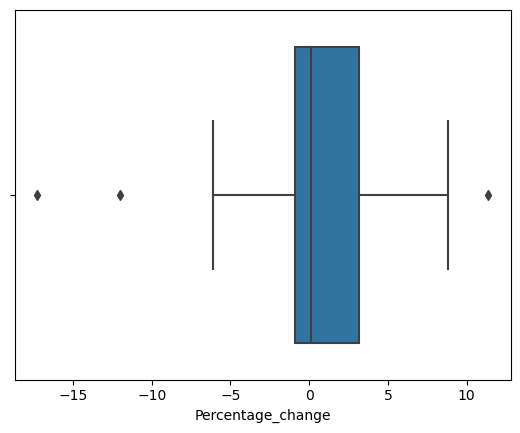

In [87]:
sns.boxplot(data=segment2_monday, x=segment2_monday['Percentage_change'])

<AxesSubplot:xlabel='Percentage_change'>

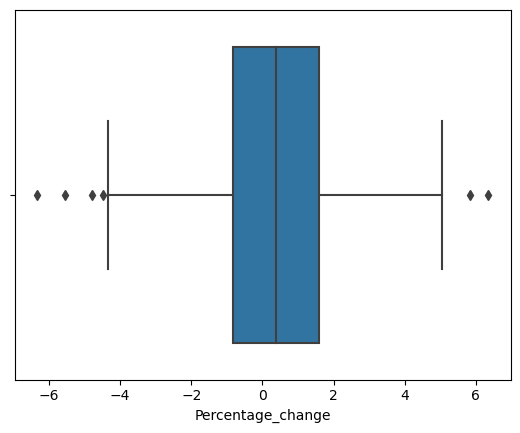

In [88]:
sns.boxplot(data=segment3_monday, x=segment3_monday['Percentage_change'])

**For tuesday**

<AxesSubplot:xlabel='Percentage_change'>

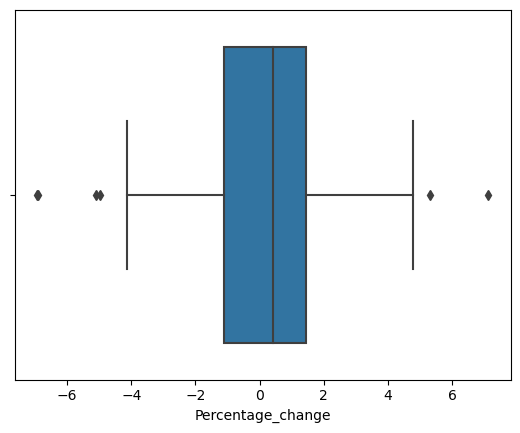

In [89]:
sns.boxplot(data=segment1_tuesday, x=segment1_tuesday['Percentage_change'])

<AxesSubplot:xlabel='Percentage_change'>

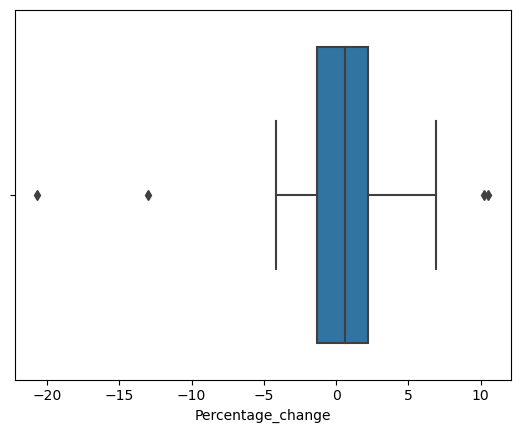

In [90]:
sns.boxplot(data=segment2_tuesday, x=segment2_tuesday['Percentage_change'])

<AxesSubplot:xlabel='Percentage_change'>

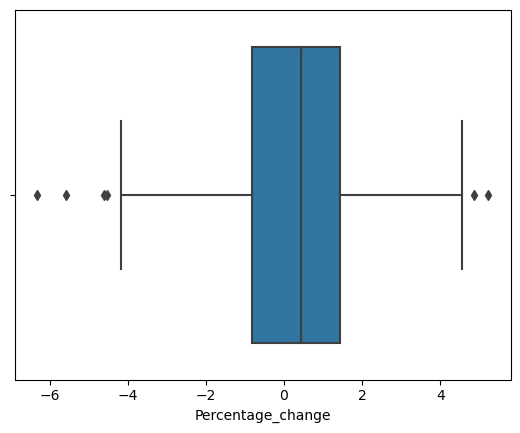

In [91]:
sns.boxplot(data=segment3_tuesday, x=segment3_tuesday['Percentage_change'])

**For wednesday**

<AxesSubplot:xlabel='Percentage_change'>

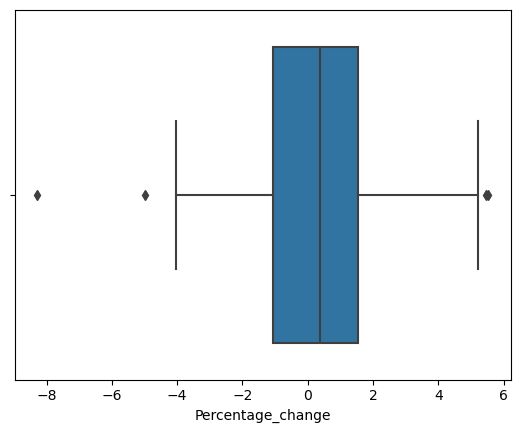

In [92]:
sns.boxplot(data=segment1_wednesday, x=segment1_wednesday['Percentage_change'])

<AxesSubplot:xlabel='Percentage_change'>

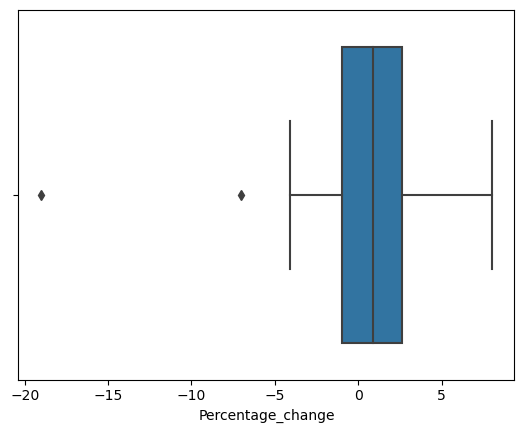

In [93]:
sns.boxplot(data=segment2_wednesday, x=segment2_wednesday['Percentage_change'])

<AxesSubplot:xlabel='Percentage_change'>

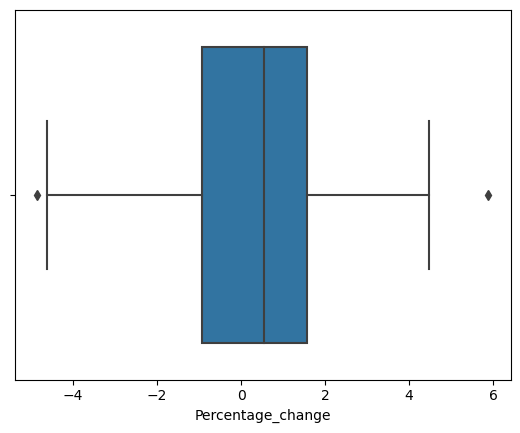

In [94]:
sns.boxplot(data=segment3_wednesday, x=segment3_wednesday['Percentage_change'])

**For thursday**

<AxesSubplot:xlabel='Percentage_change'>

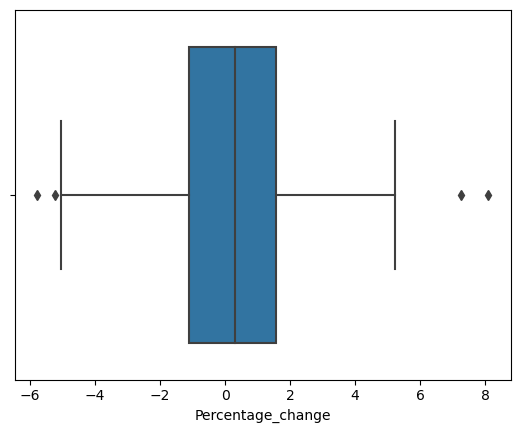

In [95]:
sns.boxplot(data=segment1_thursday, x=segment1_thursday['Percentage_change'])

<AxesSubplot:xlabel='Percentage_change'>

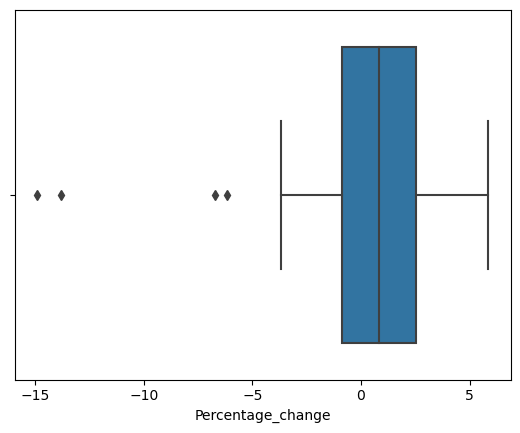

In [96]:
sns.boxplot(data=segment2_thursday, x=segment2_thursday['Percentage_change'])

<AxesSubplot:xlabel='Percentage_change'>

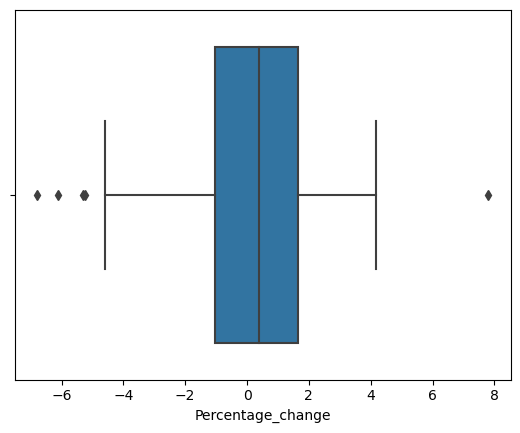

In [97]:
sns.boxplot(data=segment3_thursday, x=segment3_thursday['Percentage_change'])

**For friday**

<AxesSubplot:xlabel='Percentage_change'>

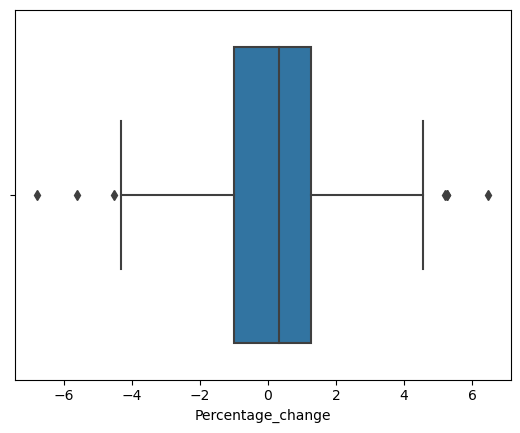

In [98]:
sns.boxplot(data=segment1_friday, x=segment1_friday['Percentage_change'])

<AxesSubplot:xlabel='Percentage_change'>

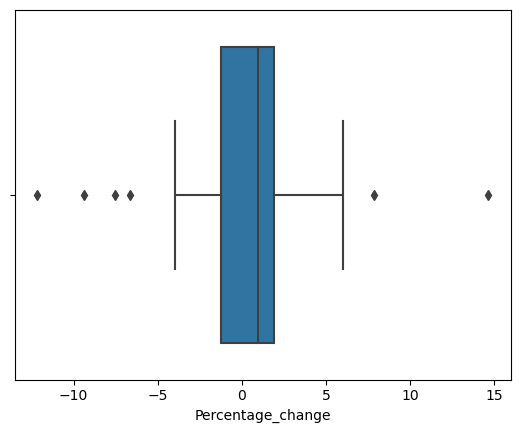

In [99]:
sns.boxplot(data=segment2_friday, x=segment2_friday['Percentage_change'])

<AxesSubplot:xlabel='Percentage_change'>

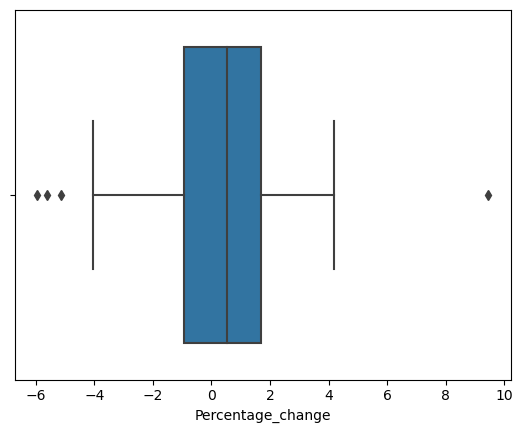

In [100]:
sns.boxplot(data=segment3_friday, x=segment3_friday['Percentage_change'])

**Find IQR**

In [101]:
def find_range(d):
    q1, q3 = d.quantile([0.25,0.75])
    iqr = q3-q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    print(f"q1:{q1}, q3:{q3}, IQR: {iqr}")
    return lower_bound, upper_bound

In [102]:
segment1_monday['Percentage_change'].describe()

count    243.000000
mean       0.179492
std        2.139534
min       -7.883406
25%       -0.948160
50%        0.275723
75%        1.601730
max        7.896036
Name: Percentage_change, dtype: float64

In [103]:
find_range(segment1_monday['Percentage_change'])

q1:-0.9481597532793453, q3:1.6017295052364933, IQR: 2.5498892585158384


(-4.772993641053103, 5.426563393010251)

**Funtion to remove outliers**

In [104]:
def remove_outliers(df, column_name, lower_bound, upper_bound):
    outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
    
    filtered = df[~outliers]
    return filtered 

filtered_segment1_monday = remove_outliers(segment1_monday, 'Percentage_change', -4.77, 5.42)
filtered_segment1_monday 

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
2225,2015-01-05,8378.40,8407.95,8445.60,8363.90,1.181600e+11,-0.0020,0,NaN
2220,2015-01-12,8323.00,8291.35,8332.60,8245.60,1.031500e+11,0.0046,0,-0.661224
2215,2015-01-19,8550.70,8550.05,8570.95,8531.50,1.293500e+11,0.0043,0,2.735792
2206,2015-02-02,8797.40,8802.50,8840.80,8751.10,2.165600e+11,-0.0013,0,2.885144
2201,2015-02-09,8526.35,8584.40,8605.55,8516.35,1.513300e+11,-0.0156,0,-3.081024
...,...,...,...,...,...,...,...,...,...
1014,2019-12-02,12048.20,12137.05,12137.15,12023.70,7.209500e+11,-0.0007,0,-0.211616
1009,2019-12-09,11937.50,11939.10,11981.95,11888.05,5.991200e+11,0.0013,0,-0.918809
1004,2019-12-16,12053.95,12131.35,12134.65,12046.30,4.377000e+11,-0.0027,0,0.975497
999,2019-12-23,12262.75,12235.45,12287.15,12213.25,6.047800e+11,-0.0007,0,1.732212


In [105]:
segment1_tuesday['Percentage_change'].describe()

count    245.000000
mean       0.184110
std        1.962207
min       -6.924811
25%       -1.099937
50%        0.400666
75%        1.448461
max        7.123576
Name: Percentage_change, dtype: float64

In [106]:
find_range(segment1_tuesday['Percentage_change'])

q1:-1.0999373340097238, q3:1.4484612260066234, IQR: 2.5483985600163472


(-4.922535174034245, 5.271059066031144)

In [107]:
filtered_segment1_tuesday = remove_outliers(segment1_tuesday, 'Percentage_change', -4.92, 5.27)
filtered_segment1_tuesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
2224,2015-01-06,8127.35,8325.30,8327.85,8111.35,1.728000e+11,-0.0300,1,NaN
2219,2015-01-13,8299.40,8346.15,8356.65,8267.90,1.295600e+11,-0.0028,1,2.116926
2214,2015-01-20,8695.60,8575.10,8707.90,8574.50,1.587100e+11,0.0169,1,4.773839
2210,2015-01-27,8910.50,8871.35,8925.05,8825.45,1.920100e+11,0.0085,1,2.471365
2205,2015-02-03,8756.55,8823.15,8837.30,8726.65,2.086700e+11,-0.0046,1,-1.727737
...,...,...,...,...,...,...,...,...,...
1013,2019-12-03,11994.20,12067.65,12068.60,11956.40,6.057900e+11,-0.0045,1,-0.361365
1008,2019-12-10,11856.80,11950.50,11953.20,11844.70,6.502200e+11,-0.0068,1,-1.145554
1003,2019-12-17,12165.00,12082.45,12182.75,12070.35,4.995900e+11,0.0092,1,2.599352
998,2019-12-24,12214.55,12269.25,12283.70,12202.10,4.702900e+11,-0.0039,1,0.407316


In [108]:
segment1_wednesday['Percentage_change'].describe()

count    249.000000
mean       0.183499
std        1.911758
min       -8.278841
25%       -1.052444
50%        0.380235
75%        1.541947
max        5.530572
Name: Percentage_change, dtype: float64

In [109]:
find_range(segment1_wednesday['Percentage_change'])

q1:-1.0524441278603822, q3:1.5419465296984103, IQR: 2.5943906575587925


(-4.944030114198571, 5.4335325160366)

In [110]:
filtered_segment1_wednesday = remove_outliers(segment1_wednesday, 'Percentage_change', -4.94, 5.43)
filtered_segment1_wednesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
2223,2015-01-07,8102.10,8118.65,8151.20,8065.45,1.640700e+11,-0.0031,2,NaN
2218,2015-01-14,8277.55,8307.25,8326.45,8236.65,1.506200e+11,-0.0026,2,2.165488
2209,2015-01-28,8914.30,8902.75,8985.05,8874.05,1.908100e+11,0.0004,2,2.116960
2204,2015-02-04,8723.70,8789.15,8792.85,8704.40,2.012500e+11,-0.0038,2,-2.138138
2199,2015-02-11,8627.40,8603.30,8651.95,8593.65,1.665600e+11,0.0072,2,-1.103889
...,...,...,...,...,...,...,...,...,...
1022,2019-11-20,11999.10,12004.75,12038.60,11966.05,6.466600e+11,0.0049,2,1.339898
1017,2019-11-27,12100.70,12068.50,12114.90,12055.15,5.842300e+11,0.0052,2,0.846730
1012,2019-12-04,12043.20,11969.95,12054.70,11935.30,7.471900e+11,0.0041,2,-0.475179
1007,2019-12-11,11910.15,11867.35,11923.20,11832.30,9.976500e+11,0.0045,2,-1.104773


In [111]:
segment1_thursday['Percentage_change'].describe()

count    246.000000
mean       0.175585
std        2.033293
min       -5.775932
25%       -1.099476
50%        0.315062
75%        1.573628
max        8.093566
Name: Percentage_change, dtype: float64

In [112]:
find_range(segment1_thursday['Percentage_change'])

q1:-1.0994764097701428, q3:1.5736282502503753, IQR: 2.673104660020518


(-5.109133399800919, 5.583285240281152)

In [113]:
filtered_segment1_thursday = remove_outliers(segment1_thursday, 'Percentage_change', -5.10, 5.58)
filtered_segment1_thursday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
2227,2015-01-01,8284.00,8272.80,8294.70,8248.75,5.656000e+10,0.0002,3,NaN
2222,2015-01-08,8234.60,8191.40,8243.50,8167.30,1.438000e+11,0.0164,3,-0.596330
2217,2015-01-15,8494.15,8424.50,8527.10,8380.55,2.321400e+11,0.0262,3,3.151944
2212,2015-01-22,8761.40,8745.85,8774.15,8727.00,1.809100e+11,0.0037,3,3.146283
2208,2015-01-29,8952.35,8901.50,8966.65,8861.25,2.642500e+11,0.0043,3,2.179446
...,...,...,...,...,...,...,...,...,...
1016,2019-11-28,12151.15,12132.10,12158.80,12099.95,6.204800e+11,0.0042,3,1.526938
1011,2019-12-05,12018.40,12071.25,12081.20,11998.75,5.622300e+11,-0.0021,3,-1.092489
1006,2019-12-12,11971.80,11944.30,12005.50,11934.00,7.526200e+11,0.0052,3,-0.387739
1001,2019-12-19,12259.70,12223.40,12268.35,12191.15,6.230500e+11,0.0031,3,2.404818


In [114]:
segment1_friday['Percentage_change'].describe()

count    243.000000
mean       0.173483
std        1.901498
min       -6.785194
25%       -0.996287
50%        0.331982
75%        1.253809
max        6.481027
Name: Percentage_change, dtype: float64

In [115]:
find_range(segment1_friday['Percentage_change'])

q1:-0.9962871216811646, q3:1.2538091281798804, IQR: 2.250096249861045


(-4.371431496472732, 4.628953502971448)

In [116]:
filtered_segment1_friday = remove_outliers(segment1_friday, 'Percentage_change', -4.37, 4.62)
filtered_segment1_friday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
2226,2015-01-02,8395.45,8288.70,8410.60,8288.70,1.018900e+11,0.0135,4,NaN
2221,2015-01-09,8284.50,8285.45,8303.30,8190.80,1.526100e+11,0.0061,4,-1.321549
2216,2015-01-16,8513.80,8504.05,8530.75,8452.25,1.813700e+11,0.0023,4,2.767819
2211,2015-01-23,8835.60,8827.95,8866.40,8795.40,1.971200e+11,0.0085,4,3.779746
2207,2015-01-30,8808.90,8996.60,8996.60,8775.10,2.755900e+11,-0.0160,4,-0.302187
...,...,...,...,...,...,...,...,...,...
1015,2019-11-29,12056.05,12146.20,12147.40,12017.40,8.044300e+11,-0.0078,4,1.188897
1010,2019-12-06,11921.50,12047.35,12057.05,11888.85,6.092200e+11,-0.0081,4,-1.116037
1005,2019-12-13,12086.70,12026.40,12098.85,12023.60,5.977100e+11,0.0096,4,1.385732
1000,2019-12-20,12271.80,12266.45,12293.90,12252.75,8.106800e+11,0.0010,4,1.531435


**Segment 2**

In [117]:
segment2_monday['Percentage_change'].describe()

count    47.000000
mean      0.427154
std       4.802209
min     -17.256507
25%      -0.875154
50%       0.120660
75%       3.150456
max      11.366560
Name: Percentage_change, dtype: float64

In [118]:
find_range(segment2_monday['Percentage_change'])

q1:-0.8751544715697699, q3:3.150455711872905, IQR: 4.025610183442675


(-6.913569746733782, 9.188870987036918)

In [119]:
filtered_segment2_monday = remove_outliers(segment2_monday, 'Percentage_change', -6.91, 9.18)
filtered_segment2_monday.shape

(45, 9)

In [120]:
filtered_segment2_monday.shape

(45, 9)

In [121]:
segment2_tuesday['Percentage_change'].describe()

count    49.000000
mean      0.414967
std       4.771900
min     -20.668743
25%      -1.320341
50%       0.616390
75%       2.165679
max      10.522148
Name: Percentage_change, dtype: float64

In [122]:
find_range(segment2_tuesday['Percentage_change'])

q1:-1.3203406110494507, q3:2.1656794351993582, IQR: 3.486020046248809


(-6.549370680422665, 7.394709504572572)

In [123]:
filtered_segment2_tuesday = remove_outliers(segment2_tuesday, 'Percentage_change', -6.54, 7.39)
filtered_segment2_tuesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
989,2020-01-07,12052.95,12079.10,12152.15,12005.35,4.478200e+11,0.0050,1,NaN
984,2020-01-14,12362.30,12333.10,12374.25,12308.70,6.162600e+11,0.0027,1,2.566592
979,2020-01-21,12169.85,12195.30,12230.05,12162.30,4.439800e+11,-0.0045,1,-1.556749
974,2020-01-28,12055.80,12148.10,12163.55,12024.50,4.784800e+11,-0.0052,1,-0.937152
968,2020-02-04,11979.65,11786.25,11986.15,11783.40,5.604300e+11,0.0232,1,-0.631646
963,2020-02-11,12107.90,12108.40,12172.30,12099.00,4.799800e+11,0.0064,1,1.070566
958,2020-02-18,11992.50,12028.25,12030.75,11908.05,6.768500e+11,-0.0044,1,-0.953097
954,2020-02-25,11797.90,11877.50,11883.05,11779.90,4.610000e+11,-0.0027,1,-1.622681
949,2020-03-03,11303.30,11217.55,11342.25,11152.55,6.965200e+11,0.0153,1,-4.192272
927,2020-04-07,8792.20,8446.30,8819.40,8360.95,8.141800e+11,0.0876,1,2.261638


In [124]:
segment2_wednesday['Percentage_change'].describe()

count    52.000000
mean      0.347684
std       3.977125
min     -19.023942
25%      -0.999997
50%       0.905581
75%       2.643492
max       8.015073
Name: Percentage_change, dtype: float64

In [125]:
find_range(segment2_wednesday['Percentage_change'])

q1:-0.9999974487781016, q3:2.6434923650797497, IQR: 3.643489813857851


(-6.465232169564878, 8.108727085866526)

In [126]:
filtered_segment2_wednesday = remove_outliers(segment2_wednesday, 'Percentage_change', -6.46, 8.10)
filtered_segment2_wednesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
993,2020-01-01,12182.50,12202.15,12222.20,12165.30,3.040800e+11,0.0012,2,NaN
988,2020-01-08,12025.35,11939.10,12044.95,11929.60,4.459900e+11,-0.0023,2,-1.289965
983,2020-01-15,12343.30,12349.40,12355.15,12278.75,6.843500e+11,-0.0015,2,2.643998
978,2020-01-22,12106.90,12218.35,12225.05,12087.90,5.263000e+11,-0.0052,2,-1.915209
973,2020-01-29,12129.50,12114.90,12169.60,12103.80,5.143600e+11,0.0061,2,0.186670
967,2020-02-05,12089.15,12005.85,12098.15,11953.35,7.580300e+11,0.0091,2,-0.332660
962,2020-02-12,12201.20,12151.00,12231.75,12144.30,4.117300e+11,0.0077,2,0.926864
957,2020-02-19,12125.90,12090.60,12134.70,12042.10,5.135700e+11,0.0111,2,-0.617152
953,2020-02-26,11678.50,11738.55,11783.25,11639.60,5.676200e+11,-0.0101,2,-3.689623
948,2020-03-04,11251.00,11351.35,11356.60,11082.15,7.976500e+11,-0.0046,2,-3.660573


In [127]:
segment2_thursday['Percentage_change'].describe()

count    51.000000
mean      0.339987
std       4.073282
min     -14.897950
25%      -0.890333
50%       0.848718
75%       2.517426
max       5.862206
Name: Percentage_change, dtype: float64

In [128]:
find_range(segment2_thursday['Percentage_change'])

q1:-0.8903334746726517, q3:2.5174259171586715, IQR: 3.4077593918313234


(-6.0019725624196365, 7.629065004905657)

In [129]:
filtered_segment2_thursday = remove_outliers(segment2_thursday, 'Percentage_change', -6.0, 7.62)
filtered_segment2_thursday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
992,2020-01-02,12282.20,12198.55,12289.90,12195.25,4.077000e+11,0.0082,3,NaN
987,2020-01-09,12215.90,12153.15,12224.05,12132.55,4.774700e+11,0.0158,3,-0.539806
982,2020-01-16,12355.50,12347.10,12389.05,12315.80,3.956700e+11,0.0010,3,1.142773
977,2020-01-23,12180.35,12123.75,12189.00,12094.10,8.676500e+11,0.0061,3,-1.417587
972,2020-01-30,12035.80,12147.75,12150.30,12010.60,5.381400e+11,-0.0077,3,-1.186748
966,2020-02-06,12137.95,12120.00,12160.60,12084.65,5.651200e+11,0.0040,3,0.848718
961,2020-02-13,12174.65,12219.55,12225.65,12139.80,5.011900e+11,-0.0022,3,0.302357
956,2020-02-20,12080.85,12119.00,12152.00,12071.45,5.026000e+11,-0.0037,3,-0.770453
952,2020-02-27,11633.30,11661.25,11663.85,11536.70,6.086100e+11,-0.0039,3,-3.704623
947,2020-03-05,11269.00,11306.05,11389.50,11244.60,1.352490e+12,0.0016,3,-3.131528


In [130]:
segment2_friday['Percentage_change'].describe()

count    46.000000
mean      0.347014
std       4.280889
min     -12.151941
25%      -1.232544
50%       0.957672
75%       1.900546
max      14.633588
Name: Percentage_change, dtype: float64

In [131]:
find_range(segment2_friday['Percentage_change'])

q1:-1.2325436662344371, q3:1.9005460821671403, IQR: 3.133089748401577


(-5.932178288836803, 6.600180704769506)

In [132]:
filtered_segment2_friday = remove_outliers(segment2_friday, 'Percentage_change', -5.93, 6.60)
filtered_segment2_friday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
991,2020-01-03,12226.65,12261.10,12265.60,12191.35,4.287700e+11,-0.0045,4,NaN
986,2020-01-10,12256.80,12271.00,12311.20,12213.20,6.606300e+11,0.0033,4,0.246592
981,2020-01-17,12352.35,12328.40,12385.45,12321.40,5.020600e+11,-0.0003,4,0.779567
976,2020-01-24,12248.25,12174.55,12272.15,12149.65,5.932400e+11,0.0056,4,-0.842755
971,2020-01-31,11962.10,12100.40,12103.55,11945.85,7.712800e+11,-0.0061,4,-2.336252
965,2020-02-07,12098.35,12151.15,12154.70,12073.95,4.734700e+11,-0.0033,4,1.139014
960,2020-02-14,12113.45,12190.15,12246.70,12091.20,6.227800e+11,-0.0050,4,0.124810
946,2020-03-06,10989.45,10942.65,11035.10,10827.40,1.810970e+12,-0.0248,4,-1.895240
932,2020-03-27,8660.25,8949.10,9038.90,8522.90,8.014500e+11,0.0022,4,-0.974221
916,2020-04-24,9154.40,9163.90,9296.90,9141.30,6.594400e+11,-0.0171,4,-1.212399


**Segment 3**

In [133]:
segment3_monday['Percentage_change'].describe()

count    149.000000
mean       0.301274
std        2.095722
min       -6.330531
25%       -0.824415
50%        0.385422
75%        1.587355
max        6.355295
Name: Percentage_change, dtype: float64

In [134]:
find_range(segment3_monday['Percentage_change'])

q1:-0.8244152979356618, q3:1.5873553008192025, IQR: 2.411770598754864


(-4.442071196067958, 5.205011198951499)

In [135]:
filtered_segment3_monday = remove_outliers(segment3_monday, 'Percentage_change', -4.44, 5.20)
filtered_segment3_monday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
740,2021-01-04,14132.90,14104.35,14147.95,13953.75,4.950000e+11,0.0082,0,NaN
735,2021-01-11,14484.75,14474.05,14498.20,14383.10,6.728800e+11,0.0096,0,2.489581
730,2021-01-18,14281.30,14453.30,14459.15,14222.80,7.620400e+11,-0.0106,0,-1.404581
725,2021-01-25,14238.90,14477.80,14491.10,14218.60,6.186300e+11,-0.0093,0,-0.296892
721,2021-02-01,14281.20,13758.60,14336.35,13661.75,8.705300e+11,0.0474,0,0.297074
...,...,...,...,...,...,...,...,...,...
31,2023-11-13,19443.55,19486.75,19494.40,19414.75,1.892800e+11,-0.0042,0,0.163818
27,2023-11-20,19694.00,19731.15,19756.45,19670.50,1.737800e+11,-0.0019,0,1.288088
18,2023-12-04,20686.80,20601.95,20702.65,20507.75,3.811100e+11,0.0207,0,5.041129
13,2023-12-11,20997.10,20965.30,21026.10,20923.70,2.129200e+11,0.0013,0,1.499990


In [136]:
filtered_segment3_monday.shape

(144, 9)

In [137]:
segment3_tuesday['Percentage_change'].describe()

count    143.000000
mean       0.308438
std        1.994193
min       -6.311358
25%       -0.820386
50%        0.443218
75%        1.432269
max        5.226934
Name: Percentage_change, dtype: float64

In [138]:
find_range(segment3_tuesday['Percentage_change'])

q1:-0.8203859704420777, q3:1.432268772598961, IQR: 2.2526547430410386


(-4.199368085003636, 4.811250887160519)

In [139]:
filtered_segment3_tuesday = remove_outliers(segment3_tuesday, 'Percentage_change', -4.19, 4.81)
filtered_segment3_tuesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
739,2021-01-05,14199.50,14075.15,14215.60,14048.15,4.924800e+11,0.0047,1,NaN
734,2021-01-12,14563.45,14473.80,14590.65,14432.85,9.295700e+11,0.0054,1,2.563118
729,2021-01-19,14521.15,14371.65,14546.05,14350.85,5.461100e+11,0.0168,1,-0.290453
720,2021-02-02,14647.85,14481.10,14731.70,14469.15,9.149700e+11,0.0257,1,0.872520
715,2021-02-09,15109.30,15164.15,15257.10,15064.30,7.132800e+11,-0.0004,1,3.150292
...,...,...,...,...,...,...,...,...,...
26,2023-11-21,19783.40,19770.90,19829.10,19754.05,1.949700e+11,0.0045,1,1.941082
22,2023-11-28,19889.70,19844.65,19916.85,19800.00,2.296000e+11,0.0048,1,0.537319
12,2023-12-12,20906.40,21018.55,21037.90,20867.15,2.448700e+11,-0.0043,1,0.245983
7,2023-12-19,21453.10,21477.65,21505.05,21337.75,2.497500e+11,0.0016,1,2.614989


In [140]:
segment3_wednesday['Percentage_change'].describe()

count    147.000000
mean       0.307596
std        1.880207
min       -4.852314
25%       -0.920546
50%        0.537701
75%        1.561340
max        5.888312
Name: Percentage_change, dtype: float64

In [141]:
find_range(segment3_wednesday['Percentage_change'])

q1:-0.9205458827643888, q3:1.56133972390105, IQR: 2.481885606665439


(-4.643374292762547, 5.284168133899208)

In [142]:
filtered_segment3_wednesday = remove_outliers(segment3_wednesday, 'Percentage_change', -4.64, 5.28)
filtered_segment3_wednesday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
738,2021-01-06,14146.25,14240.95,14244.15,14039.90,6.323200e+11,-0.0038,2,NaN
733,2021-01-13,14564.85,14639.80,14653.35,14435.70,8.739600e+11,0.0001,2,2.959088
728,2021-01-20,14644.70,14538.30,14666.45,14517.55,6.230700e+11,0.0085,2,0.548238
724,2021-01-27,13967.50,14237.95,14237.95,13929.30,6.607100e+11,-0.0191,2,-4.624199
714,2021-02-10,15106.50,15119.05,15168.25,14977.20,6.247900e+11,-0.0002,2,2.140305
...,...,...,...,...,...,...,...,...,...
21,2023-11-29,20096.60,19976.55,20104.65,19956.30,2.362400e+11,0.0104,2,1.437271
16,2023-12-06,20937.70,20950.75,20961.95,20852.15,3.592100e+11,0.0040,2,4.185285
11,2023-12-13,20926.35,20929.75,20950.00,20769.50,2.602700e+11,0.0010,2,-0.054208
6,2023-12-20,21150.15,21543.50,21593.00,21087.35,3.638900e+11,-0.0141,2,1.069465


In [143]:
segment3_thursday['Percentage_change'].describe()

count    148.000000
mean       0.315696
std        2.162858
min       -6.781728
25%       -1.025645
50%        0.389745
75%        1.652934
max        7.802396
Name: Percentage_change, dtype: float64

In [144]:
find_range(segment3_thursday['Percentage_change'])

q1:-1.0256449402486287, q3:1.6529343517987676, IQR: 2.678579292047396


(-5.0435138783197235, 5.670803289869863)

In [145]:
filtered_segment3_thursday = remove_outliers(segment3_thursday, 'Percentage_change', -5.04, 5.67)
filtered_segment3_thursday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
737,2021-01-07,14137.35,14253.75,14256.25,14123.10,5.591700e+11,-0.0006,3,NaN
732,2021-01-14,14595.60,14550.05,14617.80,14471.50,6.201900e+11,0.0021,3,3.241414
727,2021-01-21,14590.35,14730.95,14753.55,14517.25,7.046500e+11,-0.0037,3,-0.035970
713,2021-02-11,15173.30,15073.25,15188.50,15065.40,5.001200e+11,0.0044,3,1.863967
708,2021-02-18,15118.95,15238.70,15250.75,15078.05,7.706300e+11,-0.0059,3,-0.358195
...,...,...,...,...,...,...,...,...,...
20,2023-11-30,20133.15,20108.50,20158.70,20015.85,4.865900e+11,0.0018,3,1.672306
15,2023-12-07,20901.15,20932.40,20941.25,20850.80,2.749900e+11,-0.0017,3,3.814604
10,2023-12-14,21182.70,21110.40,21210.90,21074.45,3.344100e+11,0.0123,3,1.347055
5,2023-12-21,21255.05,21033.95,21288.35,20976.80,2.775500e+11,0.0050,3,0.341552


In [146]:
segment3_friday['Percentage_change'].describe()

count    147.000000
mean       0.320861
std        2.115829
min       -5.945506
25%       -0.943495
50%        0.543970
75%        1.695971
max        9.458657
Name: Percentage_change, dtype: float64

In [147]:
find_range(segment3_friday['Percentage_change'])

q1:-0.9434954550653869, q3:1.6959713613400682, IQR: 2.639466816405455


(-4.9026956796735695, 5.655171585948251)

In [148]:
filtered_segment3_friday = remove_outliers(segment3_friday, 'Percentage_change', -4.90, 5.65)
filtered_segment3_friday

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
741,2021-01-01,14018.50,13996.10,14049.85,13991.35,2.580900e+11,0.0026,4,NaN
736,2021-01-08,14347.25,14258.40,14367.30,14221.65,6.134700e+11,0.0148,4,2.345115
731,2021-01-15,14433.70,14594.35,14617.45,14357.85,7.895600e+11,-0.0111,4,0.602554
726,2021-01-22,14371.90,14583.40,14619.90,14357.75,7.767500e+11,-0.0150,4,-0.428165
712,2021-02-12,15163.30,15186.20,15243.50,15081.00,5.718100e+11,-0.0007,4,1.601756
...,...,...,...,...,...,...,...,...,...
19,2023-12-01,20267.90,20194.10,20291.55,20183.70,2.658100e+11,0.0067,4,2.390539
14,2023-12-08,20969.40,20934.10,21006.10,20862.70,2.924400e+11,0.0033,4,3.461138
9,2023-12-15,21456.65,21287.45,21492.30,21235.30,5.087600e+11,0.0129,4,2.323624
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845


### Merge 2015-2019

In [149]:
result = pd.concat([filtered_segment1_monday,filtered_segment1_tuesday,filtered_segment1_wednesday,filtered_segment1_thursday,filtered_segment1_friday])

In [150]:
result

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
2225,2015-01-05,8378.40,8407.95,8445.60,8363.90,1.181600e+11,-0.0020,0,NaN
2220,2015-01-12,8323.00,8291.35,8332.60,8245.60,1.031500e+11,0.0046,0,-0.661224
2215,2015-01-19,8550.70,8550.05,8570.95,8531.50,1.293500e+11,0.0043,0,2.735792
2206,2015-02-02,8797.40,8802.50,8840.80,8751.10,2.165600e+11,-0.0013,0,2.885144
2201,2015-02-09,8526.35,8584.40,8605.55,8516.35,1.513300e+11,-0.0156,0,-3.081024
...,...,...,...,...,...,...,...,...,...
1015,2019-11-29,12056.05,12146.20,12147.40,12017.40,8.044300e+11,-0.0078,4,1.188897
1010,2019-12-06,11921.50,12047.35,12057.05,11888.85,6.092200e+11,-0.0081,4,-1.116037
1005,2019-12-13,12086.70,12026.40,12098.85,12023.60,5.977100e+11,0.0096,4,1.385732
1000,2019-12-20,12271.80,12266.45,12293.90,12252.75,8.106800e+11,0.0010,4,1.531435


In [151]:
result.dropna(inplace=True)

In [152]:
result.shape

(1197, 9)

In [153]:
def daynames(dn):
    if dn['Day']==0:
        return "Monday"
    elif (dn['Day']==1):
        return "Tuesday"
    elif (dn['Day']==2):
        return "Wednesday"
    elif (dn['Day']==3):
        return "Thursday"
    elif (dn['Day']==4):
        return "Friday"
    else:
        return None
    

In [154]:
result["Day_name"] = result.apply(daynames,axis=1)

result

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name
2220,2015-01-12,8323.00,8291.35,8332.60,8245.60,1.031500e+11,0.0046,0,-0.661224,Monday
2215,2015-01-19,8550.70,8550.05,8570.95,8531.50,1.293500e+11,0.0043,0,2.735792,Monday
2206,2015-02-02,8797.40,8802.50,8840.80,8751.10,2.165600e+11,-0.0013,0,2.885144,Monday
2201,2015-02-09,8526.35,8584.40,8605.55,8516.35,1.513300e+11,-0.0156,0,-3.081024,Monday
2196,2015-02-16,8809.35,8831.40,8870.10,8793.40,1.406400e+11,0.0004,0,3.319122,Monday
...,...,...,...,...,...,...,...,...,...,...
1015,2019-11-29,12056.05,12146.20,12147.40,12017.40,8.044300e+11,-0.0078,4,1.188897,Friday
1010,2019-12-06,11921.50,12047.35,12057.05,11888.85,6.092200e+11,-0.0081,4,-1.116037,Friday
1005,2019-12-13,12086.70,12026.40,12098.85,12023.60,5.977100e+11,0.0096,4,1.385732,Friday
1000,2019-12-20,12271.80,12266.45,12293.90,12252.75,8.106800e+11,0.0010,4,1.531435,Friday


### Merge 2020

In [155]:
result2020 = pd.concat([filtered_segment2_monday,filtered_segment2_tuesday,filtered_segment2_wednesday,filtered_segment2_thursday,filtered_segment2_friday])

In [156]:
result2020

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
990,2020-01-06,11993.05,12170.60,12179.10,11974.20,3.965000e+11,-0.0191,0,NaN
985,2020-01-13,12329.55,12296.70,12337.75,12285.80,5.009700e+11,0.0059,0,2.805792
980,2020-01-20,12224.55,12430.50,12430.50,12216.90,4.916100e+11,-0.0103,0,-0.851613
975,2020-01-27,12119.00,12197.10,12216.60,12107.00,4.411600e+11,-0.0106,0,-0.863426
969,2020-02-03,11707.90,11627.45,11749.85,11614.50,6.698200e+11,0.0039,0,-3.392194
...,...,...,...,...,...,...,...,...,...
769,2020-11-20,12859.05,12813.40,12892.45,12730.25,6.640000e+11,0.0068,4,1.093558
764,2020-11-27,12968.95,13012.05,13035.30,12914.30,1.162360e+12,-0.0014,4,0.854651
760,2020-12-04,13258.55,13177.40,13280.05,13152.85,6.405100e+11,0.0095,4,2.233026
755,2020-12-11,13513.85,13512.30,13579.35,13402.85,7.877100e+11,0.0026,4,1.925550


In [157]:
result2020.dropna(inplace=True)

In [158]:
result2020.shape

(226, 9)

In [159]:
result2020["Day_name"] = result2020.apply(daynames,axis=1)
result2020

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name
985,2020-01-13,12329.55,12296.70,12337.75,12285.80,5.009700e+11,0.0059,0,2.805792,Monday
980,2020-01-20,12224.55,12430.50,12430.50,12216.90,4.916100e+11,-0.0103,0,-0.851613,Monday
975,2020-01-27,12119.00,12197.10,12216.60,12107.00,4.411600e+11,-0.0106,0,-0.863426,Monday
969,2020-02-03,11707.90,11627.45,11749.85,11614.50,6.698200e+11,0.0039,0,-3.392194,Monday
964,2020-02-10,12031.50,12102.35,12103.55,11990.75,5.247100e+11,-0.0055,0,2.763946,Monday
...,...,...,...,...,...,...,...,...,...,...
769,2020-11-20,12859.05,12813.40,12892.45,12730.25,6.640000e+11,0.0068,4,1.093558,Friday
764,2020-11-27,12968.95,13012.05,13035.30,12914.30,1.162360e+12,-0.0014,4,0.854651,Friday
760,2020-12-04,13258.55,13177.40,13280.05,13152.85,6.405100e+11,0.0095,4,2.233026,Friday
755,2020-12-11,13513.85,13512.30,13579.35,13402.85,7.877100e+11,0.0026,4,1.925550,Friday


### Merge 2021-2023

In [160]:
result2123 = pd.concat([filtered_segment3_monday,filtered_segment3_tuesday,filtered_segment3_wednesday,filtered_segment3_thursday,filtered_segment3_friday])

In [161]:
result2123

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change
740,2021-01-04,14132.90,14104.35,14147.95,13953.75,4.950000e+11,0.0082,0,NaN
735,2021-01-11,14484.75,14474.05,14498.20,14383.10,6.728800e+11,0.0096,0,2.489581
730,2021-01-18,14281.30,14453.30,14459.15,14222.80,7.620400e+11,-0.0106,0,-1.404581
725,2021-01-25,14238.90,14477.80,14491.10,14218.60,6.186300e+11,-0.0093,0,-0.296892
721,2021-02-01,14281.20,13758.60,14336.35,13661.75,8.705300e+11,0.0474,0,0.297074
...,...,...,...,...,...,...,...,...,...
19,2023-12-01,20267.90,20194.10,20291.55,20183.70,2.658100e+11,0.0067,4,2.390539
14,2023-12-08,20969.40,20934.10,21006.10,20862.70,2.924400e+11,0.0033,4,3.461138
9,2023-12-15,21456.65,21287.45,21492.30,21235.30,5.087600e+11,0.0129,4,2.323624
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845


In [162]:
result2123.dropna(inplace=True)

In [163]:
result2123["Day_name"] = result2123.apply(daynames,axis=1)

In [164]:
result2123

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name
735,2021-01-11,14484.75,14474.05,14498.20,14383.10,6.728800e+11,0.0096,0,2.489581,Monday
730,2021-01-18,14281.30,14453.30,14459.15,14222.80,7.620400e+11,-0.0106,0,-1.404581,Monday
725,2021-01-25,14238.90,14477.80,14491.10,14218.60,6.186300e+11,-0.0093,0,-0.296892,Monday
721,2021-02-01,14281.20,13758.60,14336.35,13661.75,8.705300e+11,0.0474,0,0.297074,Monday
711,2021-02-15,15314.70,15270.30,15340.15,15243.40,4.559600e+11,0.0100,0,1.315842,Monday
...,...,...,...,...,...,...,...,...,...,...
19,2023-12-01,20267.90,20194.10,20291.55,20183.70,2.658100e+11,0.0067,4,2.390539,Friday
14,2023-12-08,20969.40,20934.10,21006.10,20862.70,2.924400e+11,0.0033,4,3.461138,Friday
9,2023-12-15,21456.65,21287.45,21492.30,21235.30,5.087600e+11,0.0129,4,2.323624,Friday
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845,Friday


### Combining results in one dataframe

In [165]:
data = pd.concat([result,result2020,result2123])

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134 entries, 2220 to 0
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2134 non-null   datetime64[ns]
 1   Close              2134 non-null   float64       
 2   Open               2134 non-null   float64       
 3   High               2134 non-null   float64       
 4   Low                2134 non-null   float64       
 5   Volume             2134 non-null   float64       
 6   Chg%               2134 non-null   float64       
 7   Day                2134 non-null   int64         
 8   Percentage_change  2134 non-null   float64       
 9   Day_name           2134 non-null   object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 183.4+ KB


In [167]:
data.dropna(inplace=True)

In [168]:
data.shape

(2134, 10)

### Check outliers in combined data

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Percentage_change'>

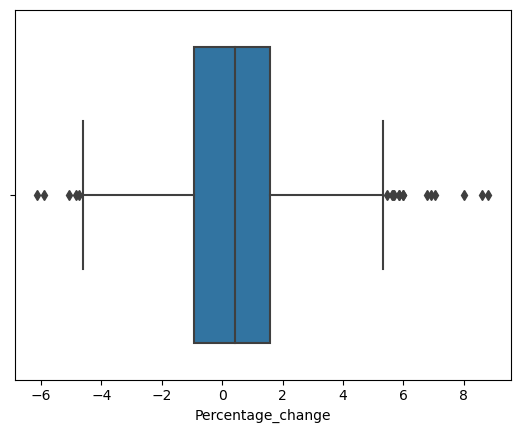

In [169]:
sns.boxplot(data["Percentage_change"])

In [170]:
find_range(data['Percentage_change'])

q1:-0.9339566797697326, q3:1.5827835805334725, IQR: 2.516740260303205


(-4.70906707022454, 5.357893970988281)

### Remove outliers

In [171]:
filtered_data = remove_outliers(data, 'Percentage_change', -4.70, 5.35)
filtered_data 

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name
2220,2015-01-12,8323.00,8291.35,8332.60,8245.60,1.031500e+11,0.0046,0,-0.661224,Monday
2215,2015-01-19,8550.70,8550.05,8570.95,8531.50,1.293500e+11,0.0043,0,2.735792,Monday
2206,2015-02-02,8797.40,8802.50,8840.80,8751.10,2.165600e+11,-0.0013,0,2.885144,Monday
2201,2015-02-09,8526.35,8584.40,8605.55,8516.35,1.513300e+11,-0.0156,0,-3.081024,Monday
2196,2015-02-16,8809.35,8831.40,8870.10,8793.40,1.406400e+11,0.0004,0,3.319122,Monday
...,...,...,...,...,...,...,...,...,...,...
19,2023-12-01,20267.90,20194.10,20291.55,20183.70,2.658100e+11,0.0067,4,2.390539,Friday
14,2023-12-08,20969.40,20934.10,21006.10,20862.70,2.924400e+11,0.0033,4,3.461138,Friday
9,2023-12-15,21456.65,21287.45,21492.30,21235.30,5.087600e+11,0.0129,4,2.323624,Friday
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845,Friday


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Percentage_change'>

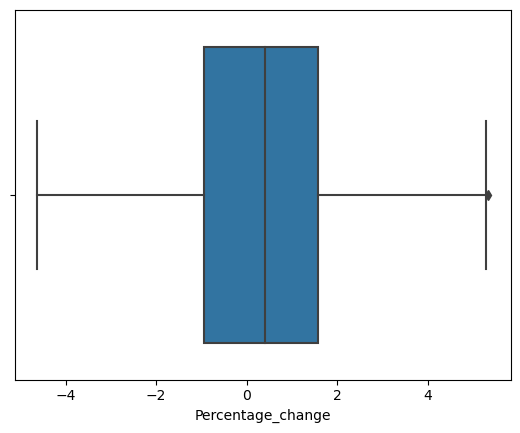

In [172]:
sns.boxplot(filtered_data["Percentage_change"])

### Technical indicators (RSI, SMA50, SMA200, EMA50, EMA200)

**Note: Adding 2014 data to get RSI, SMA and EMA from 2015**

In [173]:
nifty2014 = pd.read_excel("Nifty50-2014.xlsx")
nifty2014.sort_values(by=["Date"],ascending=True,inplace=True)

In [174]:
nifty2014

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name
90,2014-01-08,6174.60,6178.05,6192.10,6160.35,146910000000,0.0020,2,-2.016139,Wednesday
140,2014-01-09,6168.35,6181.70,6188.05,6148.25,150060000000,-0.0010,3,-0.848718,Thursday
183,2014-01-10,6171.45,6178.85,6239.10,6139.60,159920000000,0.0005,4,-0.639173,Friday
0,2014-01-13,6272.75,6189.55,6288.20,6189.55,135010000000,0.0164,0,1.313101,Monday
47,2014-01-14,6241.85,6260.25,6280.35,6234.15,110230000000,-0.0049,1,1.291736,Tuesday
...,...,...,...,...,...,...,...,...,...,...
138,2014-12-24,8174.10,8272.05,8286.40,8155.25,221910000000,-0.0112,2,1.797056,Wednesday
227,2014-12-26,8200.70,8204.80,8234.55,8147.95,75530000000,0.0033,4,-0.297865,Friday
46,2014-12-29,8246.30,8214.70,8279.15,8214.70,82090000000,0.0056,0,-0.933445,Monday
89,2014-12-30,8248.25,8260.30,8268.25,8220.55,77700000000,0.0002,1,-0.226805,Tuesday


### RSI Calculation

In [175]:
filtered_data.sort_values(by=["Date"],ascending=True,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\748719780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.sort_values(by=["Date"],ascending=True,inplace=True)


In [176]:
filtered_data = pd.concat([nifty2014,filtered_data])
filtered_data

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name
90,2014-01-08,6174.60,6178.05,6192.10,6160.35,1.469100e+11,0.0020,2,-2.016139,Wednesday
140,2014-01-09,6168.35,6181.70,6188.05,6148.25,1.500600e+11,-0.0010,3,-0.848718,Thursday
183,2014-01-10,6171.45,6178.85,6239.10,6139.60,1.599200e+11,0.0005,4,-0.639173,Friday
0,2014-01-13,6272.75,6189.55,6288.20,6189.55,1.350100e+11,0.0164,0,1.313101,Monday
47,2014-01-14,6241.85,6260.25,6280.35,6234.15,1.102300e+11,-0.0049,1,1.291736,Tuesday
...,...,...,...,...,...,...,...,...,...,...
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845,Friday
3,2023-12-26,21441.35,21365.20,21477.15,21329.45,2.194700e+11,0.0043,1,-0.054771,Tuesday
2,2023-12-27,21654.75,21497.65,21675.75,21495.80,2.565400e+11,0.0100,2,2.385799,Wednesday
1,2023-12-28,21778.70,21715.00,21801.45,21678.00,3.930800e+11,0.0057,3,2.463650,Thursday


In [177]:
def calculate_rsi(data, period=14):
    delta = data['Close'].diff(1)
    
    gains = delta.where(delta > 0, 0)
    losses = -delta.where(delta < 0, 0)
    
    avg_gains = gains.rolling(window=period, min_periods=14).mean()
    avg_losses = losses.rolling(window=period, min_periods=14).mean()
    
    rs = avg_gains / avg_losses
    rsi = 100 - (100 / (1 + rs))
    
    return rsi 

In [178]:
filtered_data["RSI"] = calculate_rsi(filtered_data)
filtered_data.head(20)

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name,RSI
90,2014-01-08,6174.60,6178.05,6192.10,6160.35,1.469100e+11,0.0020,2,-2.016139,Wednesday,NaN
140,2014-01-09,6168.35,6181.70,6188.05,6148.25,1.500600e+11,-0.0010,3,-0.848718,Thursday,NaN
183,2014-01-10,6171.45,6178.85,6239.10,6139.60,1.599200e+11,0.0005,4,-0.639173,Friday,NaN
0,2014-01-13,6272.75,6189.55,6288.20,6189.55,1.350100e+11,0.0164,0,1.313101,Monday,NaN
47,2014-01-14,6241.85,6260.25,6280.35,6234.15,1.102300e+11,-0.0049,1,1.291736,Tuesday,NaN
91,2014-01-15,6320.90,6265.95,6325.20,6265.30,1.459200e+11,0.0127,2,2.369384,Wednesday,NaN
141,2014-01-16,6318.90,6341.35,6346.50,6299.85,1.534200e+11,-0.0003,3,2.440685,Thursday,NaN
184,2014-01-17,6261.65,6306.25,6327.10,6246.35,1.677200e+11,-0.0091,4,1.461569,Friday,NaN
1,2014-01-20,6303.95,6261.75,6307.45,6243.35,1.221400e+11,0.0068,0,0.497390,Monday,NaN
48,2014-01-21,6313.80,6320.15,6330.30,6297.90,1.417300e+11,0.0016,1,1.152703,Tuesday,NaN


### SMA 50

In [179]:
def calculate_sma(data, column_name='Close', window=50):
    data['SMA50'] = data[column_name].rolling(window=window, min_periods=50).mean()
    return data

In [180]:
calculate_sma(filtered_data) 
filtered_data.head(60)

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name,RSI,SMA50
90,2014-01-08,6174.60,6178.05,6192.10,6160.35,1.469100e+11,0.0020,2,-2.016139,Wednesday,NaN,NaN
140,2014-01-09,6168.35,6181.70,6188.05,6148.25,1.500600e+11,-0.0010,3,-0.848718,Thursday,NaN,NaN
183,2014-01-10,6171.45,6178.85,6239.10,6139.60,1.599200e+11,0.0005,4,-0.639173,Friday,NaN,NaN
0,2014-01-13,6272.75,6189.55,6288.20,6189.55,1.350100e+11,0.0164,0,1.313101,Monday,NaN,NaN
47,2014-01-14,6241.85,6260.25,6280.35,6234.15,1.102300e+11,-0.0049,1,1.291736,Tuesday,NaN,NaN
91,2014-01-15,6320.90,6265.95,6325.20,6265.30,1.459200e+11,0.0127,2,2.369384,Wednesday,NaN,NaN
141,2014-01-16,6318.90,6341.35,6346.50,6299.85,1.534200e+11,-0.0003,3,2.440685,Thursday,NaN,NaN
184,2014-01-17,6261.65,6306.25,6327.10,6246.35,1.677200e+11,-0.0091,4,1.461569,Friday,NaN,NaN
1,2014-01-20,6303.95,6261.75,6307.45,6243.35,1.221400e+11,0.0068,0,0.497390,Monday,NaN,NaN
48,2014-01-21,6313.80,6320.15,6330.30,6297.90,1.417300e+11,0.0016,1,1.152703,Tuesday,NaN,NaN


### SMA 200

In [181]:
def calculate_sma(data, column_name='Close', window=200):
    data['SMA200'] = data[column_name].rolling(window=window, min_periods=200).mean()
    return data

In [182]:
calculate_sma(filtered_data) 

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name,RSI,SMA50,SMA200
90,2014-01-08,6174.60,6178.05,6192.10,6160.35,1.469100e+11,0.0020,2,-2.016139,Wednesday,NaN,NaN,NaN
140,2014-01-09,6168.35,6181.70,6188.05,6148.25,1.500600e+11,-0.0010,3,-0.848718,Thursday,NaN,NaN,NaN
183,2014-01-10,6171.45,6178.85,6239.10,6139.60,1.599200e+11,0.0005,4,-0.639173,Friday,NaN,NaN,NaN
0,2014-01-13,6272.75,6189.55,6288.20,6189.55,1.350100e+11,0.0164,0,1.313101,Monday,NaN,NaN,NaN
47,2014-01-14,6241.85,6260.25,6280.35,6234.15,1.102300e+11,-0.0049,1,1.291736,Tuesday,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845,Friday,76.797661,19997.447,19043.00100
3,2023-12-26,21441.35,21365.20,21477.15,21329.45,2.194700e+11,0.0043,1,-0.054771,Tuesday,72.311423,20032.477,19063.24425
2,2023-12-27,21654.75,21497.65,21675.75,21495.80,2.565400e+11,0.0100,2,2.385799,Wednesday,71.683450,20069.345,19084.99825
1,2023-12-28,21778.70,21715.00,21801.45,21678.00,3.930800e+11,0.0057,3,2.463650,Thursday,75.204641,20109.039,19106.63725


In [183]:
filtered_data.iloc[195:,:]

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name,RSI,SMA50,SMA200
177,2014-11-13,8357.85,8405.25,8408.00,8320.35,1.273600e+11,-0.0030,3,2.309284,Thursday,92.677346,8033.382,NaN
221,2014-11-14,8389.90,8360.70,8400.65,8346.80,1.467700e+11,0.0038,4,0.634521,Friday,91.864852,8043.358,NaN
40,2014-11-17,8430.75,8378.40,8438.10,8349.10,1.138800e+11,0.0049,0,1.036642,Monday,91.763534,8053.709,NaN
84,2014-11-18,8425.90,8441.25,8454.50,8407.25,1.346800e+11,-0.0006,1,0.756339,Tuesday,89.896085,8064.101,NaN
133,2014-11-19,8382.30,8440.65,8455.65,8360.50,1.254000e+11,-0.0052,2,-0.011928,Wednesday,82.610623,8073.652,7252.35550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845,Friday,76.797661,19997.447,19043.00100
3,2023-12-26,21441.35,21365.20,21477.15,21329.45,2.194700e+11,0.0043,1,-0.054771,Tuesday,72.311423,20032.477,19063.24425
2,2023-12-27,21654.75,21497.65,21675.75,21495.80,2.565400e+11,0.0100,2,2.385799,Wednesday,71.683450,20069.345,19084.99825
1,2023-12-28,21778.70,21715.00,21801.45,21678.00,3.930800e+11,0.0057,3,2.463650,Thursday,75.204641,20109.039,19106.63725


### EMA50

In [184]:
def calculate_ema50(data, column_name='Close', window=50):
    ema_column_name = f'EMA{window}'
    data["EMA50"] = data[column_name].ewm(span=window, adjust=False).mean()
    return data 

In [185]:
calculate_ema50(filtered_data)

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name,RSI,SMA50,SMA200,EMA50
90,2014-01-08,6174.60,6178.05,6192.10,6160.35,1.469100e+11,0.0020,2,-2.016139,Wednesday,NaN,NaN,NaN,6174.600000
140,2014-01-09,6168.35,6181.70,6188.05,6148.25,1.500600e+11,-0.0010,3,-0.848718,Thursday,NaN,NaN,NaN,6174.354902
183,2014-01-10,6171.45,6178.85,6239.10,6139.60,1.599200e+11,0.0005,4,-0.639173,Friday,NaN,NaN,NaN,6174.240984
0,2014-01-13,6272.75,6189.55,6288.20,6189.55,1.350100e+11,0.0164,0,1.313101,Monday,NaN,NaN,NaN,6178.104083
47,2014-01-14,6241.85,6260.25,6280.35,6234.15,1.102300e+11,-0.0049,1,1.291736,Tuesday,NaN,NaN,NaN,6180.603923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845,Friday,76.797661,19997.447,19043.00100,20270.978182
3,2023-12-26,21441.35,21365.20,21477.15,21329.45,2.194700e+11,0.0043,1,-0.054771,Tuesday,72.311423,20032.477,19063.24425,20316.875116
2,2023-12-27,21654.75,21497.65,21675.75,21495.80,2.565400e+11,0.0100,2,2.385799,Wednesday,71.683450,20069.345,19084.99825,20369.340798
1,2023-12-28,21778.70,21715.00,21801.45,21678.00,3.930800e+11,0.0057,3,2.463650,Thursday,75.204641,20109.039,19106.63725,20424.609786


### EMA200

In [186]:
def calculate_ema200(data, column_name='Close', window=200):
    data["EMA200"] = data[column_name].ewm(span=window, adjust=False).mean()
    return data

In [187]:
calculate_ema200(filtered_data)

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name,RSI,SMA50,SMA200,EMA50,EMA200
90,2014-01-08,6174.60,6178.05,6192.10,6160.35,1.469100e+11,0.0020,2,-2.016139,Wednesday,NaN,NaN,NaN,6174.600000,6174.600000
140,2014-01-09,6168.35,6181.70,6188.05,6148.25,1.500600e+11,-0.0010,3,-0.848718,Thursday,NaN,NaN,NaN,6174.354902,6174.537811
183,2014-01-10,6171.45,6178.85,6239.10,6139.60,1.599200e+11,0.0005,4,-0.639173,Friday,NaN,NaN,NaN,6174.240984,6174.507086
0,2014-01-13,6272.75,6189.55,6288.20,6189.55,1.350100e+11,0.0164,0,1.313101,Monday,NaN,NaN,NaN,6178.104083,6175.484628
47,2014-01-14,6241.85,6260.25,6280.35,6234.15,1.102300e+11,-0.0049,1,1.291736,Tuesday,NaN,NaN,NaN,6180.603923,6176.144980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845,Friday,76.797661,19997.447,19043.00100,20270.978182,19271.491342
3,2023-12-26,21441.35,21365.20,21477.15,21329.45,2.194700e+11,0.0043,1,-0.054771,Tuesday,72.311423,20032.477,19063.24425,20316.875116,19293.081976
2,2023-12-27,21654.75,21497.65,21675.75,21495.80,2.565400e+11,0.0100,2,2.385799,Wednesday,71.683450,20069.345,19084.99825,20369.340798,19316.581160
1,2023-12-28,21778.70,21715.00,21801.45,21678.00,3.930800e+11,0.0057,3,2.463650,Thursday,75.204641,20109.039,19106.63725,20424.609786,19341.079855


In [188]:
filtered_data.head()

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name,RSI,SMA50,SMA200,EMA50,EMA200
90,2014-01-08,6174.60,6178.05,6192.10,6160.35,1.469100e+11,0.0020,2,-2.016139,Wednesday,NaN,NaN,NaN,6174.600000,6174.600000
140,2014-01-09,6168.35,6181.70,6188.05,6148.25,1.500600e+11,-0.0010,3,-0.848718,Thursday,NaN,NaN,NaN,6174.354902,6174.537811
183,2014-01-10,6171.45,6178.85,6239.10,6139.60,1.599200e+11,0.0005,4,-0.639173,Friday,NaN,NaN,NaN,6174.240984,6174.507086
0,2014-01-13,6272.75,6189.55,6288.20,6189.55,1.350100e+11,0.0164,0,1.313101,Monday,NaN,NaN,NaN,6178.104083,6175.484628
47,2014-01-14,6241.85,6260.25,6280.35,6234.15,1.102300e+11,-0.0049,1,1.291736,Tuesday,NaN,NaN,NaN,6180.603923,6176.144980


### Drop records of 2014

In [189]:
filtered_data = filtered_data[filtered_data['Date'].dt.year != 2014]

In [190]:
filtered_data

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name,RSI,SMA50,SMA200,EMA50,EMA200
2222,2015-01-08,8234.60,8191.40,8243.50,8167.30,1.438000e+11,0.0164,3,-0.596330,Thursday,43.468408,8272.339,7571.56700,8241.990888,7656.889907
2221,2015-01-09,8284.50,8285.45,8303.30,8190.80,1.526100e+11,0.0061,4,-1.321549,Friday,49.540381,8280.749,7582.53225,8243.657912,7663.134784
2220,2015-01-12,8323.00,8291.35,8332.60,8245.60,1.031500e+11,0.0046,0,-0.661224,Monday,55.597057,8292.245,7593.37000,8246.769366,7669.700607
2219,2015-01-13,8299.40,8346.15,8356.65,8267.90,1.295600e+11,-0.0028,1,2.116926,Tuesday,54.420563,8302.639,7603.93650,8248.833313,7675.966272
2218,2015-01-14,8277.55,8307.25,8326.45,8236.65,1.506200e+11,-0.0026,2,2.165488,Wednesday,66.861771,8310.602,7614.32400,8249.959457,7681.952180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845,Friday,76.797661,19997.447,19043.00100,20270.978182,19271.491342
3,2023-12-26,21441.35,21365.20,21477.15,21329.45,2.194700e+11,0.0043,1,-0.054771,Tuesday,72.311423,20032.477,19063.24425,20316.875116,19293.081976
2,2023-12-27,21654.75,21497.65,21675.75,21495.80,2.565400e+11,0.0100,2,2.385799,Wednesday,71.683450,20069.345,19084.99825,20369.340798,19316.581160
1,2023-12-28,21778.70,21715.00,21801.45,21678.00,3.930800e+11,0.0057,3,2.463650,Thursday,75.204641,20109.039,19106.63725,20424.609786,19341.079855


### KDE Plot

<AxesSubplot:xlabel='Percentage_change', ylabel='Density'>

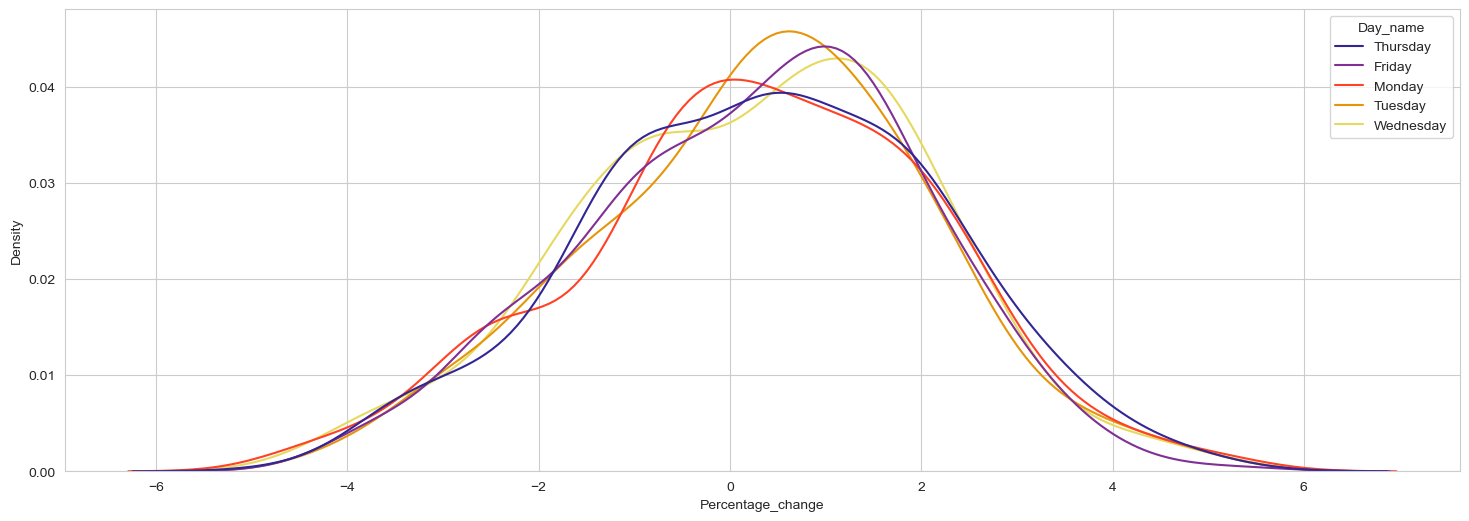

In [191]:
plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")
color_palette = sns.color_palette("CMRmap", n_colors=len(data['Day_name'].unique()))
sns.kdeplot(data=filtered_data, x="Percentage_change",hue="Day_name",fill=False,palette=color_palette) 

## Phase 2: statistical analysis , descriptive stats , normality test , independent t test , correlation coefficients (pairwise)


### KS test (To check normality)

In [192]:
from scipy.stats import kstest, norm

statistic, p_value = kstest(filtered_data['Percentage_change'], 'norm', args=(filtered_data['Percentage_change'].mean(), filtered_data['Percentage_change'].std()))
print(f"KS Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The data does not follow a normal distribution.")
else:
    print("Fail to reject the null hypothesis: The data may follow a normal distribution.")

KS Statistic: 0.028849999189470787
P-value: 0.05801116954002661
Fail to reject the null hypothesis: The data may follow a normal distribution.


## Q-Q plot

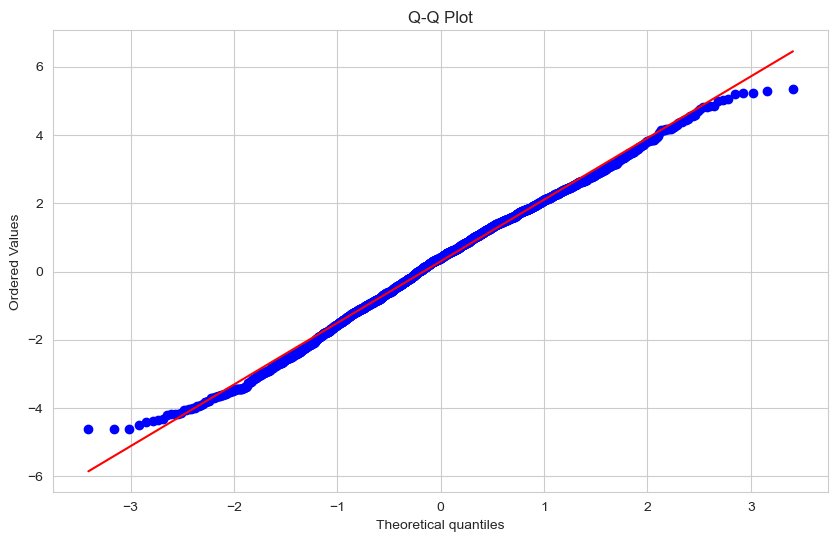

In [193]:
plt.figure(figsize=(10,6))
stats.probplot(filtered_data['Percentage_change'], dist="norm", plot=plt)
plt.title("Q-Q Plot") 
plt.show() 

### Histogram

<AxesSubplot:xlabel='Percentage_change', ylabel='Count'>

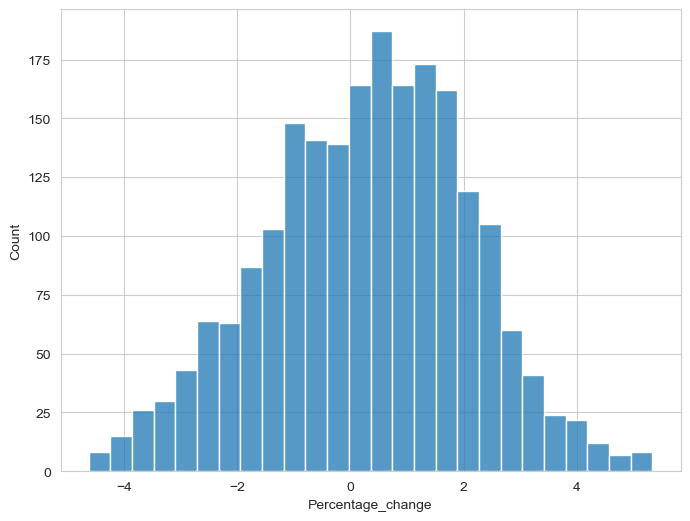

In [194]:
plt.figure(figsize=(8,6))
sns.histplot(filtered_data["Percentage_change"])

### Independent t-test

In [195]:
def perform_test(df, day_col, pct_change):
    weekdays = df[day_col].unique()
    
    for i in range(len(weekdays)-1):
            day1, day2 = weekdays[i], weekdays[i+1]
            print(day1,day2)
            group1 = df[df[day_col]==day1][pct_change]
            group2 = df[df[day_col]==day2][pct_change]

            # H0 : The variances of the groups being compared are equal.
            # Ha : The variances of the groups being compared are not equal.
            p_value_var = stats.levene(group1, group2)
            
            t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            
            print(f"p_value_var {p_value_var}")
            print(f'T-statistic: {t_statistic}')
            print(f'P-value: {p_value}')


            # H0 : There is no significant difference between the two groups (i.e. the "means" of two groups are equal) 
            # (fail to reject, if p-value>0.05)
            
            # Ha : There is a significant difference between the two groups (i.e. the "means" of the two groups are not equal)
            # (fail to reject, if p-value<0.05)
            
            alpha = 0.05
            if p_value > alpha:
                print('Fail to reject the null hypothesis: There is no significant difference between the two groups.\n')
            else: 
                print('Reject the null hypothesis: There is a significant difference between the two groups.\n')

perform_test(filtered_data,"Day_name","Percentage_change")

Thursday Friday
p_value_var LeveneResult(statistic=1.0736440641168286, pvalue=0.3004219770197396)
T-statistic: 0.7895251493381612
P-value: 0.43002816963142376
Fail to reject the null hypothesis: There is no significant difference between the two groups.

Friday Monday
p_value_var LeveneResult(statistic=1.1021138353589839, pvalue=0.29410751254442447)
T-statistic: -0.28909914729292424
P-value: 0.7725778601661825
Fail to reject the null hypothesis: There is no significant difference between the two groups.

Monday Tuesday
p_value_var LeveneResult(statistic=1.4740642633460743, pvalue=0.22504921757438784)
T-statistic: -0.1526159392257573
P-value: 0.8787381999017727
Fail to reject the null hypothesis: There is no significant difference between the two groups.

Tuesday Wednesday
p_value_var LeveneResult(statistic=1.3490813438540175, pvalue=0.24576331079694808)
T-statistic: 0.4259657521449034
P-value: 0.6702401450465405
Fail to reject the null hypothesis: There is no significant difference bet

In [196]:
dfnew = filtered_data.groupby("Day_name")["Percentage_change"].mean()
dfnew 

Day_name
Friday       0.260648
Monday       0.296817
Thursday     0.358060
Tuesday      0.316009
Wednesday    0.263693
Name: Percentage_change, dtype: float64

### Pairwise correlation coefficients

In [197]:
def dffil(d,col_name,day):
    return d[d[col_name]==day]

In [198]:
dfm = dffil(filtered_data,"Day_name","Monday")
loc_dfm = dfm.loc[:,['Day_name','Percentage_change']].reset_index()
loc_dfm.shape

(417, 3)

In [199]:
loc_dfm.drop(['Day_name','index'],axis=1,inplace=True)
loc_dfm.rename(columns={'Percentage_change': 'Monday'},inplace=True)
type(loc_dfm)

pandas.core.frame.DataFrame

In [200]:
dft = dffil(filtered_data,"Day_name","Tuesday")
loc_dft = dft.loc[:,['Day_name','Percentage_change']].reset_index()
loc_dft 
loc_dft.drop(['Day_name','index'],axis=1,inplace=True)
loc_dft.rename(columns={'Percentage_change': 'Tuesday'},inplace=True)
loc_dft

,Tuesday
0,2.116926
1,4.773839
2,2.471365
3,-1.727737
4,-2.181224
...,...
414,1.941082
415,0.537319
416,0.245983
417,2.614989


In [201]:
dfw = dffil(filtered_data,"Day_name","Wednesday")
loc_dfw = dfw.loc[:,['Day_name','Percentage_change']].reset_index()
loc_dfw
loc_dfw.drop(['Day_name','index'],axis=1,inplace=True)
loc_dfw.rename(columns={'Percentage_change': 'Wednesday'},inplace=True)
loc_dfw

,Wednesday
0,2.165488
1,2.116960
2,-2.138138
3,-1.103889
4,2.801539
...,...
432,1.437271
433,4.185285
434,-0.054208
435,1.069465


In [202]:
dfth = dffil(filtered_data,"Day_name","Thursday")
loc_dfth = dfth.loc[:,['Day_name','Percentage_change']].reset_index()
loc_dfth
loc_dfth.drop(['Day_name','index'],axis=1,inplace=True)
loc_dfth.rename(columns={'Percentage_change': 'Thursday'},inplace=True)
loc_dfth

,Thursday
0,-0.596330
1,3.151944
2,3.146283
3,2.179446
4,-2.688121
...,...
420,1.672306
421,3.814604
422,1.347055
423,0.341552


In [203]:
dff = dffil(filtered_data,"Day_name","Friday")
loc_dff = dff.loc[:,['Day_name','Percentage_change']].reset_index()
loc_dff
loc_dff.drop(['Day_name','index'],axis=1,inplace=True)
loc_dff.rename(columns={'Percentage_change': 'Friday'},inplace=True)
loc_dff

,Friday
0,-1.321549
1,2.767819
2,3.779746
3,-0.302187
4,-1.678416
...,...
412,2.390539
413,3.461138
414,2.323624
415,-0.499845


In [204]:
df_corr = pd.concat([loc_dfm,loc_dft,loc_dfw,loc_dfth,loc_dff],axis=1)
# df_corr.fillna(0,inplace=True) 
df_corr

,Monday,Tuesday,Wednesday,Thursday,Friday
0,-0.661224,2.116926,2.165488,-0.596330,-1.321549
1,2.735792,4.773839,2.116960,3.151944,2.767819
2,2.885144,2.471365,-2.138138,3.146283,3.779746
3,-3.081024,-1.727737,-1.103889,2.179446,-0.302187
4,3.319122,-2.181224,2.801539,-2.688121,-1.678416
...,...,...,...,...,...
432,NaN,NaN,1.437271,NaN,NaN
433,NaN,NaN,4.185285,NaN,NaN
434,NaN,NaN,-0.054208,NaN,NaN
435,NaN,NaN,1.069465,NaN,NaN


In [205]:
df_corr.corr()

,Monday,Tuesday,Wednesday,Thursday,Friday
Monday,1.000000,0.094421,0.018637,0.082215,0.072639
Tuesday,0.094421,1.000000,0.013887,0.121336,0.005124
Wednesday,0.018637,0.013887,1.000000,0.050003,-0.005069
Thursday,0.082215,0.121336,0.050003,1.000000,0.015956
Friday,0.072639,0.005124,-0.005069,0.015956,1.000000


### Count of positive and negative changes 

In [206]:
positive_mondays = loc_dfm["Monday"] > 0.0
positive_mondays.value_counts()

True     240
False    177
Name: Monday, dtype: int64

In [207]:
positive_tuesdays = loc_dft["Tuesday"] > 0.0
positive_tuesdays.value_counts()

True     254
False    165
Name: Tuesday, dtype: int64

In [208]:
positive_wed = loc_dfw["Wednesday"] > 0.0
positive_wed.value_counts()

True     249
False    188
Name: Wednesday, dtype: int64

In [209]:
positive_thursdays = loc_dfth["Thursday"] > 0.0
positive_thursdays.value_counts()

True     249
False    176
Name: Thursday, dtype: int64

In [210]:
positive_fridays = loc_dff["Friday"] > 0.0
positive_fridays.value_counts()

True     245
False    172
Name: Friday, dtype: int64

### Histogram

Text(0.5, 0, 'Percentage Change')

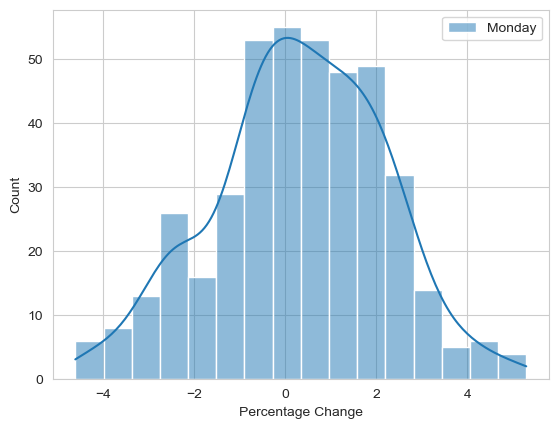

In [211]:
sns.histplot(data=loc_dfm,kde=True)
plt.xlabel("Percentage Change") 

Text(0.5, 0, 'Percentage Change')

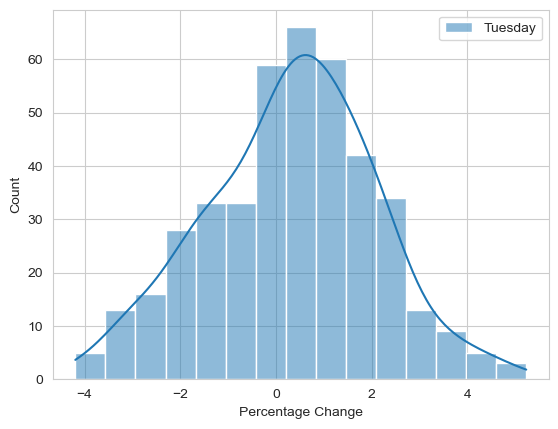

In [212]:
sns.histplot(data=loc_dft,kde=True)
plt.xlabel("Percentage Change")

Text(0.5, 0, 'Percentage Change')

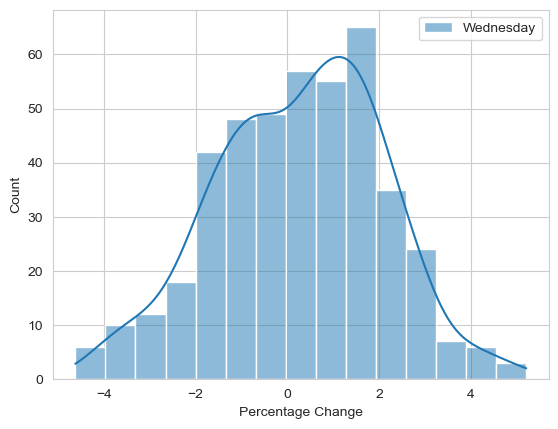

In [213]:
sns.histplot(data=loc_dfw,kde=True)
plt.xlabel("Percentage Change") 

Text(0.5, 0, 'Percentage Change')

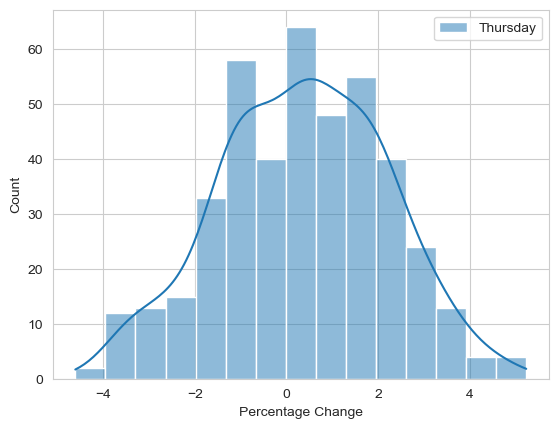

In [214]:
sns.histplot(data=loc_dfth,kde=True)
plt.xlabel("Percentage Change")

Text(0.5, 0, 'Percentage Change')

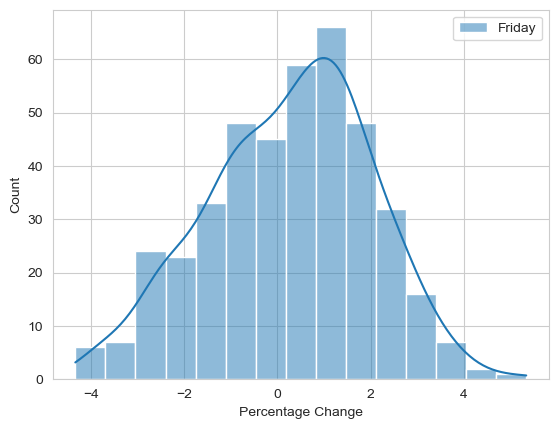

In [215]:
sns.histplot(data=loc_dff,kde=True)
plt.xlabel("Percentage Change")

### KDE PLOT 

<AxesSubplot:xlabel='Percentage_change', ylabel='Density'>

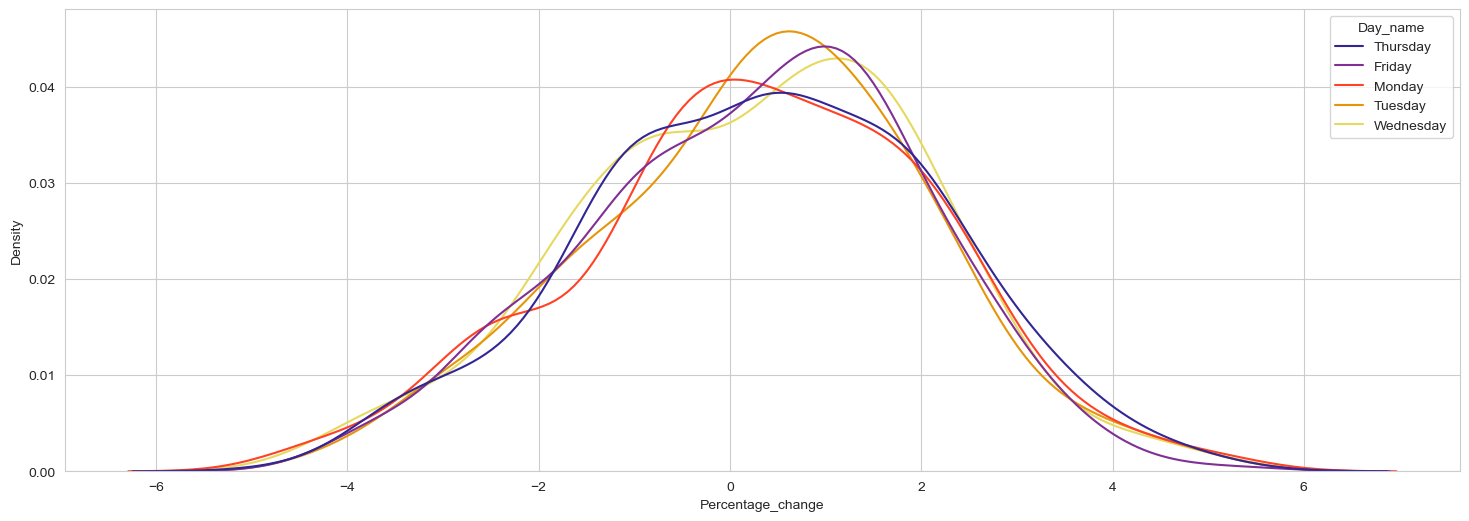

In [216]:
plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")
color_palette = sns.color_palette("CMRmap", n_colors=len(data['Day_name'].unique()))
sns.kdeplot(data=filtered_data, x="Percentage_change",hue="Day_name",fill=False,palette=color_palette) 

**Count of each day**

In [217]:
filtered_data["Day"].groupby(filtered_data["Day_name"]).count()

Day_name
Friday       417
Monday       417
Thursday     425
Tuesday      419
Wednesday    437
Name: Day, dtype: int64

### Average weekly returns 

In [218]:
average_weekly_return = filtered_data.groupby('Day_name')['Percentage_change'].mean()

In [219]:
average_weekly_return.sort_values(ascending=False) 

Day_name
Thursday     0.358060
Tuesday      0.316009
Monday       0.296817
Wednesday    0.263693
Friday       0.260648
Name: Percentage_change, dtype: float64

Text(0.5, 1.0, 'Average Weekly Returns')

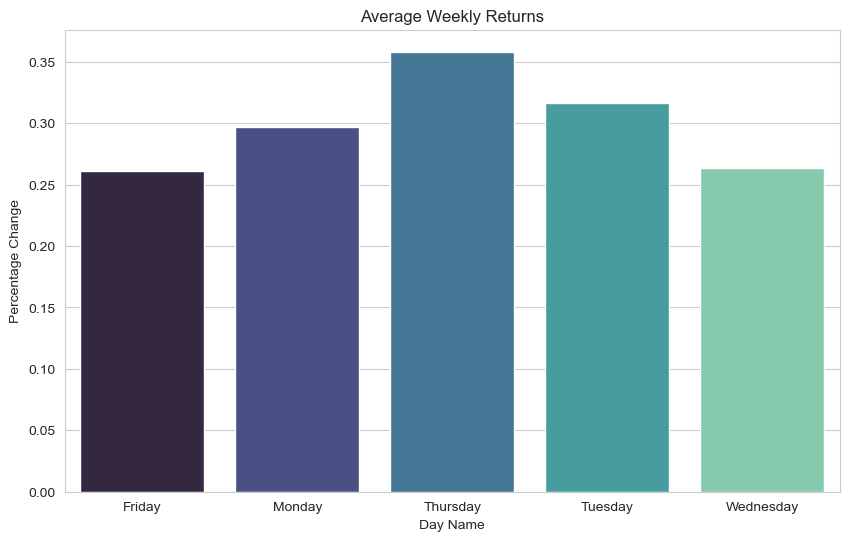

In [220]:
plt.figure(figsize=(10,6))
sns.barplot(x=average_weekly_return.index, y=average_weekly_return, palette="mako")
plt.xlabel('Day Name')  
plt.ylabel('Percentage Change') 
plt.title('Average Weekly Returns')

### Average trading volume 

In [221]:
average_volume = filtered_data.groupby('Day_name')['Volume'].mean()
average_volume.sort_values(ascending=False)

Day_name
Friday       3.346777e+11
Thursday     3.345485e+11
Wednesday    3.173797e+11
Tuesday      3.154930e+11
Monday       2.925043e+11
Name: Volume, dtype: float64

Text(0.5, 1.0, 'Average Trading Volume')

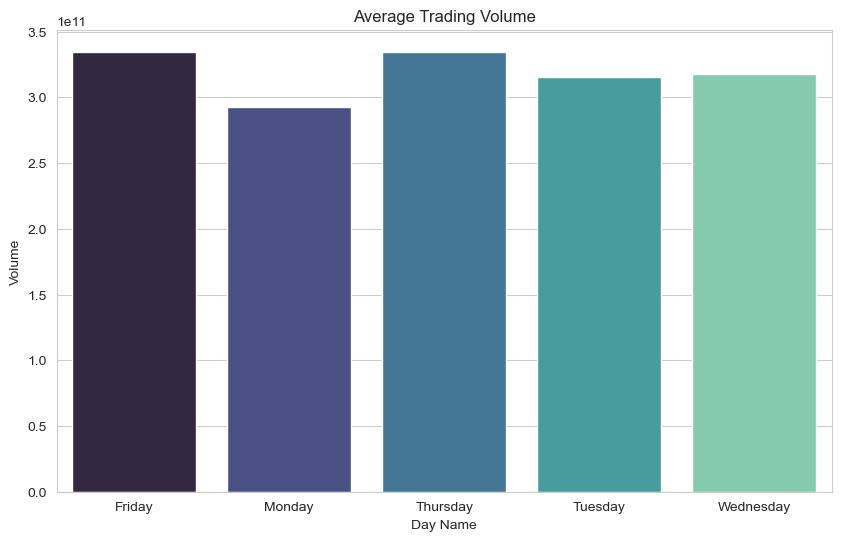

In [222]:
plt.figure(figsize=(10,6))
sns.barplot(x=average_volume.index, y=average_volume, palette='mako')
plt.xlabel('Day Name')  
plt.ylabel('Volume')
plt.title("Average Trading Volume")

### Volatility analysis

In [223]:
volatility_by_day = filtered_data.groupby('Day_name')['Percentage_change'].std()

In [224]:
volatility_by_day.sort_values(ascending=False)

Day_name
Monday       1.867146
Thursday     1.835917
Wednesday    1.825988
Tuesday      1.767301
Friday       1.743794
Name: Percentage_change, dtype: float64

Text(0.5, 1.0, 'Volatility')

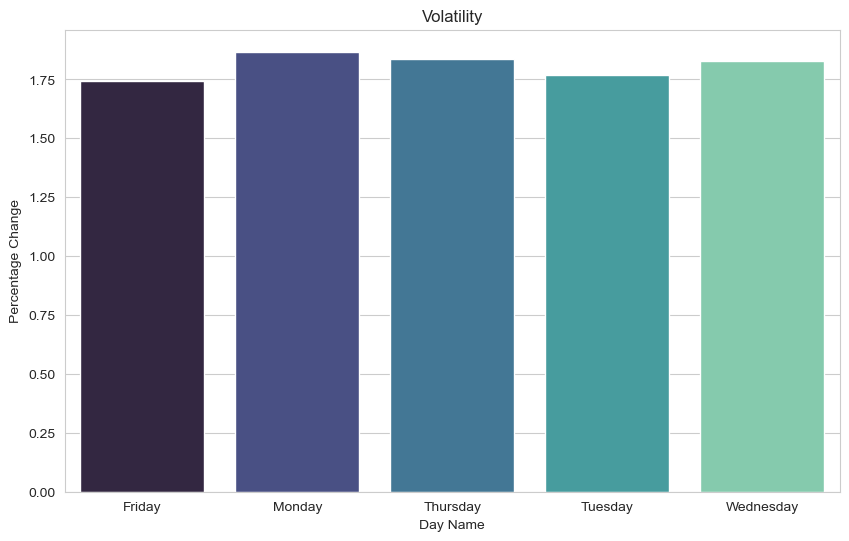

In [225]:
plt.figure(figsize=(10,6))
sns.barplot(x=volatility_by_day.index, y=volatility_by_day, palette='mako')
plt.xlabel('Day Name')  
plt.ylabel('Percentage Change')
plt.title("Volatility")

### Correlation Analysis

In [226]:
correlation_matrix = pd.DataFrame(np.corrcoef([average_weekly_return, average_volume, volatility_by_day]),index=["average_weekly_return", "average_volume", "volatility_by_day"],columns=["average_weekly_return", "average_volume", "volatility_by_day"])

In [227]:
correlation_matrix

,average_weekly_return,average_volume,volatility_by_day
average_weekly_return,1.000000,0.133112,0.323207
average_volume,0.133112,1.000000,-0.573000
volatility_by_day,0.323207,-0.573000,1.000000


### Risk Return Analysis

In [228]:
risk_return_df = pd.DataFrame({"average_weekly_return":average_weekly_return,"volatility_by_day":volatility_by_day,"average_volume":average_volume})

In [229]:
risk_return_df

,average_weekly_return,volatility_by_day,average_volume
Day_name,,,
Friday,0.260648,1.743794,3.346777e+11
Monday,0.296817,1.867146,2.925043e+11
Thursday,0.358060,1.835917,3.345485e+11
Tuesday,0.316009,1.767301,3.154930e+11
Wednesday,0.263693,1.825988,3.173797e+11


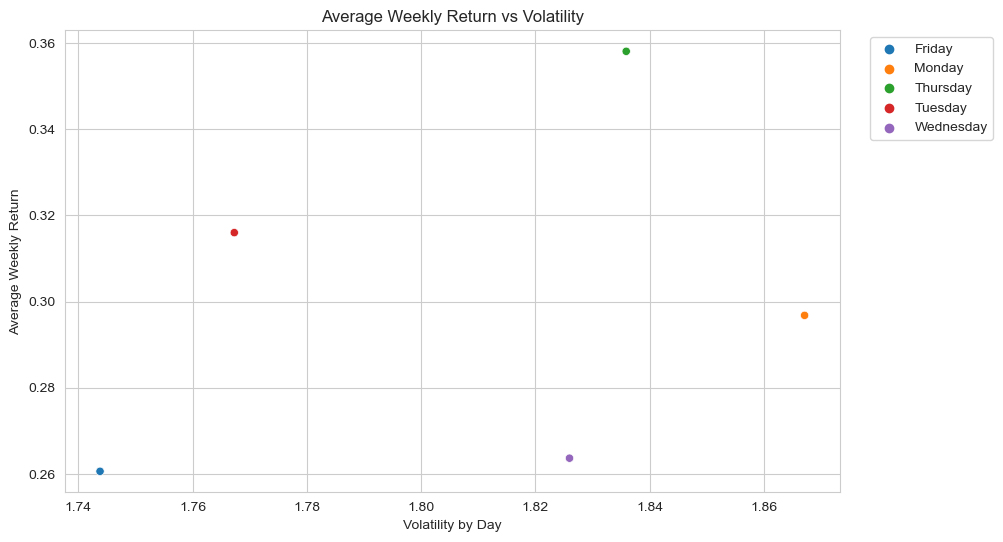

In [230]:
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='volatility_by_day', y='average_weekly_return', hue=risk_return_df.index, data=risk_return_df, sizes=(100, 400))

plt.xlabel('Volatility by Day')
plt.ylabel('Average Weekly Return')
plt.title("Average Weekly Return vs Volatility")

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left')

plt.show()


### SMA50 and SMA200 Analysis

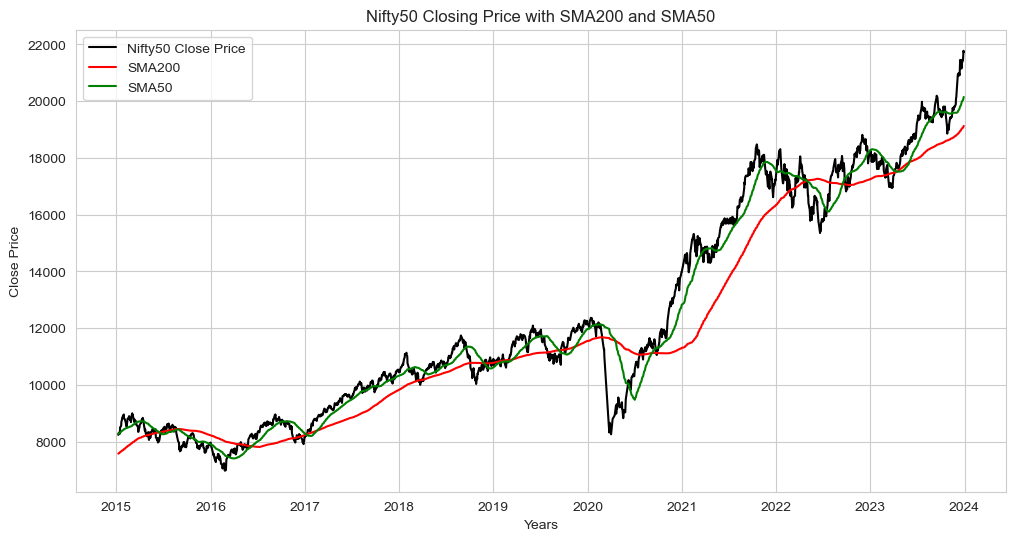

In [231]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Nifty50 Close Price', color='black')
plt.plot(filtered_data['Date'], filtered_data['SMA200'], label='SMA200', color='red')
plt.plot(filtered_data['Date'], filtered_data['SMA50'], label='SMA50', color='green')

plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Nifty50 Closing Price with SMA200 and SMA50')
plt.legend()
plt.show()

### Bullish and Bearish Trend

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\430823592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Bullish_trend_sma"] = (filtered_data["Close"] > filtered_data["SMA50"]) & (filtered_data["Close"] > filtered_data["SMA200"]) & (filtered_data["SMA50"] > filtered_data["SMA200"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\430823592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Bearish_trend_sma"] = (filtered_data["Close"] < filtered_data["SMA50"]) & (filte

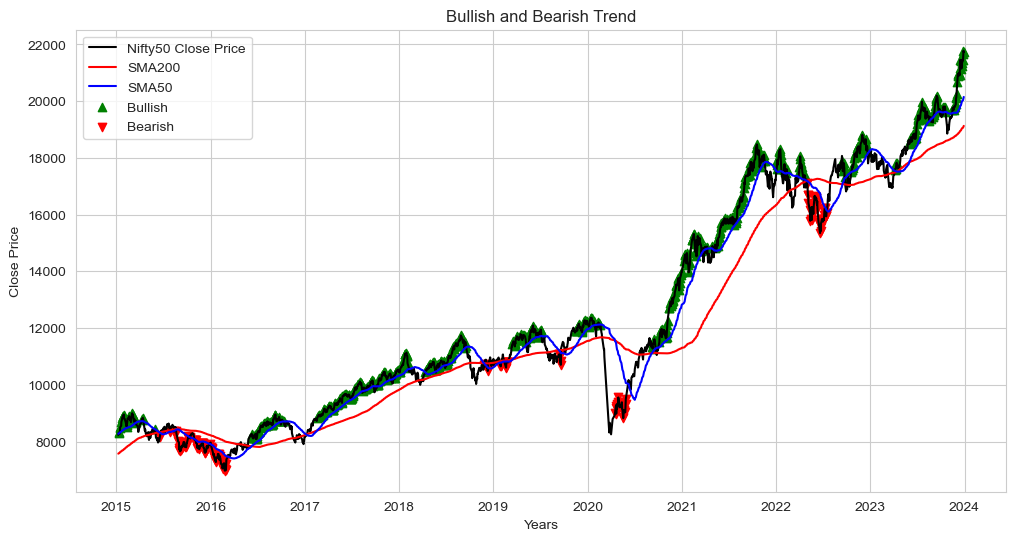

In [232]:
filtered_data["Bullish_trend_sma"] = (filtered_data["Close"] > filtered_data["SMA50"]) & (filtered_data["Close"] > filtered_data["SMA200"]) & (filtered_data["SMA50"] > filtered_data["SMA200"])
filtered_data["Bearish_trend_sma"] = (filtered_data["Close"] < filtered_data["SMA50"]) & (filtered_data["Close"] < filtered_data["SMA200"]) & (filtered_data["SMA50"] < filtered_data["SMA200"])

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Nifty50 Close Price', color='black')
plt.plot(filtered_data['Date'], filtered_data['SMA200'], label='SMA200', color='r')
plt.plot(filtered_data['Date'], filtered_data['SMA50'], label='SMA50', color='b')

plt.scatter(filtered_data[filtered_data['Bullish_trend_sma']]['Date'], filtered_data[filtered_data['Bullish_trend_sma']]['Close'], label='Bullish', marker='^', color='g')
plt.scatter(filtered_data[filtered_data['Bearish_trend_sma']]['Date'], filtered_data[filtered_data['Bearish_trend_sma']]['Close'], label='Bearish', marker='v', color='r')


plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Bullish and Bearish Trend')

plt.legend()
plt.show()

### Golden and Death Cross

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\1537227811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Golden_cross_sma"] =  (filtered_data["SMA50"] > filtered_data["SMA200"]) & (filtered_data["SMA50"].shift(1) <= filtered_data["SMA200"].shift(1))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\1537227811.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Death_cross_sma"] =   (filtered_data["SMA50"] < filtered_data["SMA200"]) & (filtered_data["SMA50"].shift(1) >= 

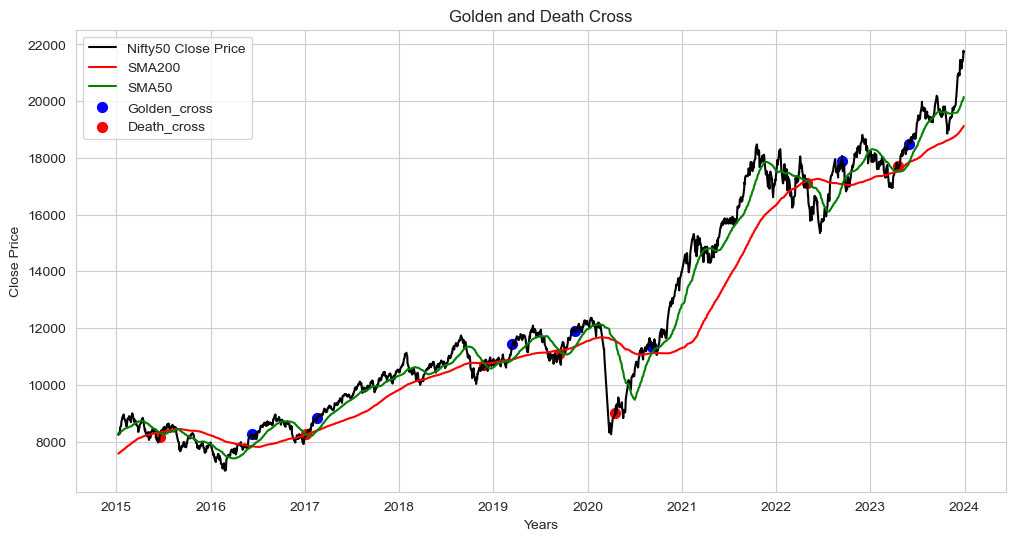

In [233]:
filtered_data["Golden_cross_sma"] =  (filtered_data["SMA50"] > filtered_data["SMA200"]) & (filtered_data["SMA50"].shift(1) <= filtered_data["SMA200"].shift(1))
filtered_data["Death_cross_sma"] =   (filtered_data["SMA50"] < filtered_data["SMA200"]) & (filtered_data["SMA50"].shift(1) >= filtered_data["SMA200"].shift(1))

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Nifty50 Close Price', color='black')
plt.plot(filtered_data['Date'], filtered_data['SMA200'], label='SMA200', color='r')
plt.plot(filtered_data['Date'], filtered_data['SMA50'], label='SMA50', color='g')

plt.scatter(filtered_data[filtered_data["Golden_cross_sma"]]['Date'], filtered_data[filtered_data["Golden_cross_sma"]]['Close'], label = 'Golden_cross', color='b', s=50)
plt.scatter(filtered_data[filtered_data["Death_cross_sma"]]['Date'], filtered_data[filtered_data["Death_cross_sma"]]['Close'], label = 'Death_cross', color='r', s=50)

plt.xlabel('Years')
plt.ylabel('Close Price') 
plt.title("Golden and Death Cross")
plt.legend() 
plt.show()

**Golden Cross**

In [234]:
golden_cross_records = filtered_data[filtered_data["Golden_cross_sma"]==True]
print(golden_cross_records["Date"])
print(golden_cross_records["Date"].dt.year.value_counts())
print(golden_cross_records["Date"].dt.month.value_counts())
print(golden_cross_records["Date"].dt.dayofweek.value_counts())

1873   2016-06-08
1699   2017-02-17
1186   2019-03-15
1025   2019-11-15
821    2020-09-08
319    2022-09-15
144    2023-06-01
Name: Date, dtype: datetime64[ns]
2019    2
2016    1
2017    1
2020    1
2022    1
2023    1
Name: Date, dtype: int64
6     2
9     2
2     1
3     1
11    1
Name: Date, dtype: int64
4    3
3    2
2    1
1    1
Name: Date, dtype: int64


**Death Cross**

In [235]:
death_cross_records = filtered_data[filtered_data["Death_cross_sma"]==True]
print(death_cross_records["Date"])
print(death_cross_records["Date"].dt.year.value_counts())
print(death_cross_records["Date"].dt.month.value_counts())
print(death_cross_records["Date"].dt.dayofweek.value_counts())

2113   2015-06-18
1729   2017-01-05
1262   2018-11-27
1066   2019-09-13
922    2020-04-16
414    2022-04-29
176    2023-04-17
Name: Date, dtype: datetime64[ns]
2015    1
2017    1
2018    1
2019    1
2020    1
2022    1
2023    1
Name: Date, dtype: int64
4     3
6     1
1     1
11    1
9     1
Name: Date, dtype: int64
3    3
4    2
1    1
0    1
Name: Date, dtype: int64


### EMA50 and EMA200 Analysis

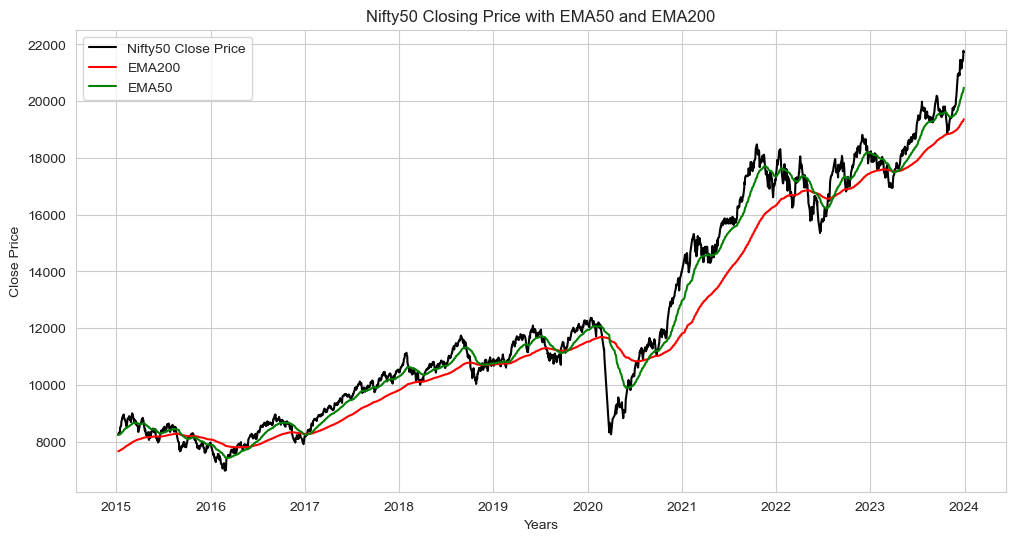

In [236]:
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Nifty50 Close Price', color='black')
plt.plot(filtered_data['Date'], filtered_data['EMA200'], label='EMA200', color='r')
plt.plot(filtered_data['Date'], filtered_data['EMA50'], label='EMA50', color='g')

plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Nifty50 Closing Price with EMA50 and EMA200')
plt.legend()
plt.show() 

### Bullish and Bearish Trend

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\3500203632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Bullish_trend_ema"] = (filtered_data["Close"] > filtered_data["EMA50"]) & (filtered_data["Close"] > filtered_data["EMA200"]) & (filtered_data["EMA50"] > filtered_data["EMA200"])
C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\3500203632.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Bearish_trend_ema"] = (filtered_data["Close"] < filtered_data["EMA50"]) & (fil

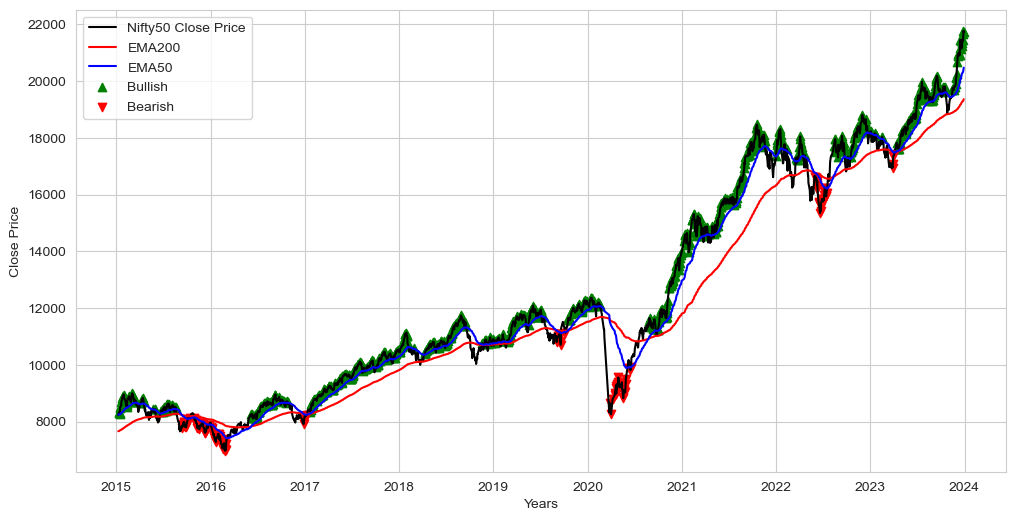

In [237]:
filtered_data["Bullish_trend_ema"] = (filtered_data["Close"] > filtered_data["EMA50"]) & (filtered_data["Close"] > filtered_data["EMA200"]) & (filtered_data["EMA50"] > filtered_data["EMA200"])
filtered_data["Bearish_trend_ema"] = (filtered_data["Close"] < filtered_data["EMA50"]) & (filtered_data["Close"] < filtered_data["EMA200"]) & (filtered_data["EMA50"] < filtered_data["EMA200"])

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Nifty50 Close Price', color='black')
plt.plot(filtered_data['Date'], filtered_data['EMA200'], label='EMA200', color='r')
plt.plot(filtered_data['Date'], filtered_data['EMA50'], label='EMA50', color='b')

plt.scatter(filtered_data[filtered_data['Bullish_trend_ema']]['Date'], filtered_data[filtered_data['Bullish_trend_ema']]['Close'], label='Bullish', marker='^', color='g')
plt.scatter(filtered_data[filtered_data['Bearish_trend_ema']]['Date'], filtered_data[filtered_data['Bearish_trend_ema']]['Close'], label='Bearish', marker='v', color='r')


plt.xlabel('Years')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Golden and Death Cross (EMA50 & EMA200)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\2932561114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Golden_cross_ema"] =  (filtered_data["SMA50"] > filtered_data["SMA200"]) & (filtered_data["SMA50"].shift(1) <= filtered_data["SMA200"].shift(1))
C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\2932561114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Death_cross_ema"] =   (filtered_data["SMA50"] < filtered_data["SMA200"]) & (filtered_data["SMA50"].shift(1) >= 

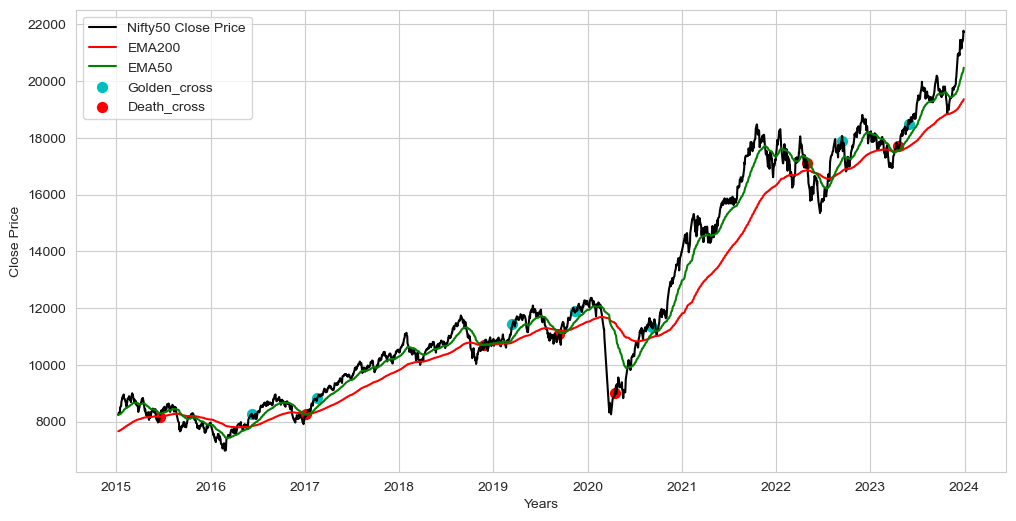

In [238]:
filtered_data["Golden_cross_ema"] =  (filtered_data["SMA50"] > filtered_data["SMA200"]) & (filtered_data["SMA50"].shift(1) <= filtered_data["SMA200"].shift(1))
filtered_data["Death_cross_ema"] =   (filtered_data["SMA50"] < filtered_data["SMA200"]) & (filtered_data["SMA50"].shift(1) >= filtered_data["SMA200"].shift(1))

plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Nifty50 Close Price', color='black')
plt.plot(filtered_data['Date'], filtered_data['EMA200'], label='EMA200', color='r')
plt.plot(filtered_data['Date'], filtered_data['EMA50'], label='EMA50', color='g')

plt.scatter(filtered_data[filtered_data["Golden_cross_ema"]]['Date'], filtered_data[filtered_data["Golden_cross_ema"]]['Close'], label = 'Golden_cross', color='c', s=50)
plt.scatter(filtered_data[filtered_data["Death_cross_ema"]]['Date'], filtered_data[filtered_data["Death_cross_ema"]]['Close'], label = 'Death_cross',color='r', s=50)

plt.xlabel('Years')
plt.ylabel('Close Price') 
plt.legend() 
plt.show()

**Golden Cross**

In [239]:
golden_cross_records = filtered_data[filtered_data["Golden_cross_ema"]==True]
print(golden_cross_records["Date"])
print(golden_cross_records["Date"].dt.year.value_counts())
print(golden_cross_records["Date"].dt.month.value_counts())
print(golden_cross_records["Date"].dt.dayofweek.value_counts())

1873   2016-06-08
1699   2017-02-17
1186   2019-03-15
1025   2019-11-15
821    2020-09-08
319    2022-09-15
144    2023-06-01
Name: Date, dtype: datetime64[ns]
2019    2
2016    1
2017    1
2020    1
2022    1
2023    1
Name: Date, dtype: int64
6     2
9     2
2     1
3     1
11    1
Name: Date, dtype: int64
4    3
3    2
2    1
1    1
Name: Date, dtype: int64


**Death Cross**

In [240]:
death_cross_records = filtered_data[filtered_data["Death_cross_ema"]==True]
print(death_cross_records["Date"])
print(death_cross_records["Date"].dt.year.value_counts())
print(death_cross_records["Date"].dt.month.value_counts())
print(death_cross_records["Date"].dt.dayofweek.value_counts())

2113   2015-06-18
1729   2017-01-05
1262   2018-11-27
1066   2019-09-13
922    2020-04-16
414    2022-04-29
176    2023-04-17
Name: Date, dtype: datetime64[ns]
2015    1
2017    1
2018    1
2019    1
2020    1
2022    1
2023    1
Name: Date, dtype: int64
4     3
6     1
1     1
11    1
9     1
Name: Date, dtype: int64
3    3
4    2
1    1
0    1
Name: Date, dtype: int64


### Relative Strength Index (RSI) 

**Overbough and Oversold**

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\1588411675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Overbought'] = filtered_data['RSI'] > overbought_condition
C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\1588411675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Oversold'] = filtered_data['RSI'] < oversold_condition


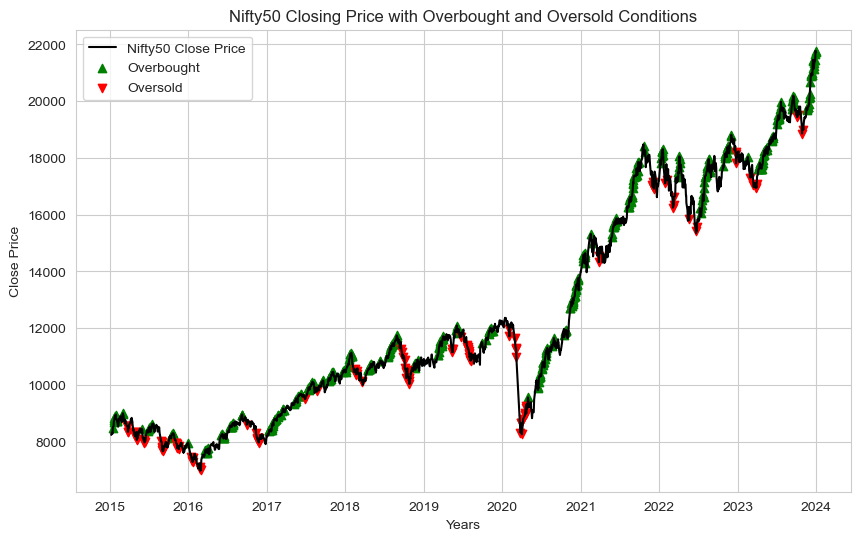

In [241]:
overbought_condition = 70
oversold_condition = 30

filtered_data['Overbought'] = filtered_data['RSI'] > overbought_condition
filtered_data['Oversold'] = filtered_data['RSI'] < oversold_condition

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['Close'], label='Nifty50 Close Price', color='black')
plt.scatter(filtered_data[filtered_data['Overbought']]['Date'], filtered_data[filtered_data['Overbought']]['Close'], label='Overbought', marker='^', color='green')
plt.scatter(filtered_data[filtered_data['Oversold']]['Date'], filtered_data[filtered_data['Oversold']]['Close'], label='Oversold', marker='v', color='red')

plt.xlabel('Years')
plt.ylabel('Close Price')
plt.title('Nifty50 Closing Price with Overbought and Oversold Conditions')
plt.legend()
plt.show()

### Correlation: RSI - Volatility

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\2581741063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Volatility'] = filtered_data['Chg%'].rolling(window=20).std()


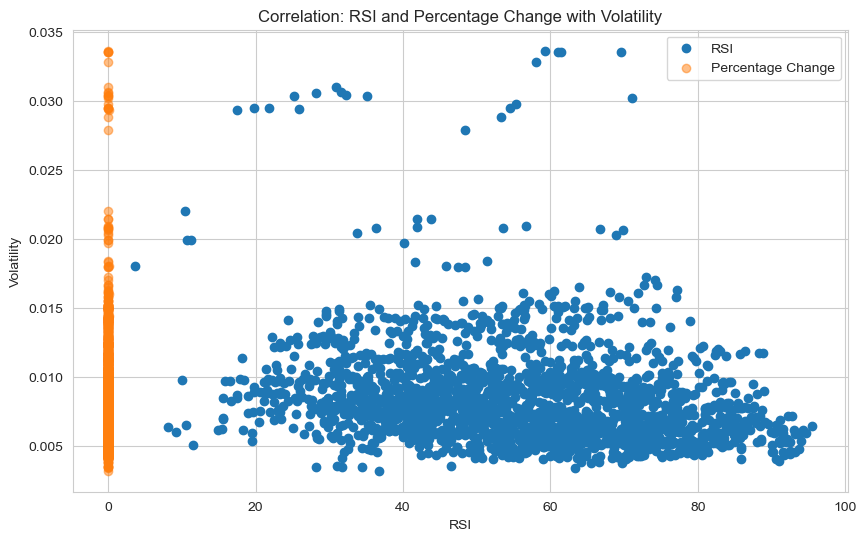

Correlation between RSI and Volatility: -0.23
Correlation between Percentage Change and Volatility: 0.04


In [242]:
plt.figure(figsize=(10,6))

filtered_data['Volatility'] = filtered_data['Chg%'].rolling(window=20).std()

correlation_rsi_volatility = filtered_data['RSI'].corr(filtered_data['Volatility'])
    
correlation_percentage_change_volatility = filtered_data['Chg%'].corr(filtered_data['Volatility'])

plt.scatter(filtered_data['RSI'], filtered_data['Volatility'], label='RSI')
plt.scatter(filtered_data['Chg%'], filtered_data['Volatility'], label='Percentage Change', alpha=0.5)

plt.title(f'Correlation: RSI and Percentage Change with Volatility') 
plt.xlabel('RSI') 
plt.ylabel('Volatility') 
plt.legend() 
plt.show() 

print(f'Correlation between RSI and Volatility: {correlation_rsi_volatility:.2f}')
print(f'Correlation between Percentage Change and Volatility: {correlation_percentage_change_volatility:.2f}')

### Dropping unnecessary columns

In [243]:
filtered_data.drop(['Volatility',"Overbought","Oversold","Bullish_trend_sma","Bearish_trend_sma","Golden_cross_sma","Death_cross_sma","Bullish_trend_ema","Bearish_trend_ema","Golden_cross_ema","Death_cross_ema"], axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19996\4195819468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(['Volatility',"Overbought","Oversold","Bullish_trend_sma","Bearish_trend_sma","Golden_cross_sma","Death_cross_sma","Bullish_trend_ema","Bearish_trend_ema","Golden_cross_ema","Death_cross_ema"], axis=1, inplace=True)


In [244]:
filtered_data

,Date,Close,Open,High,Low,Volume,Chg%,Day,Percentage_change,Day_name,RSI,SMA50,SMA200,EMA50,EMA200
2222,2015-01-08,8234.60,8191.40,8243.50,8167.30,1.438000e+11,0.0164,3,-0.596330,Thursday,43.468408,8272.339,7571.56700,8241.990888,7656.889907
2221,2015-01-09,8284.50,8285.45,8303.30,8190.80,1.526100e+11,0.0061,4,-1.321549,Friday,49.540381,8280.749,7582.53225,8243.657912,7663.134784
2220,2015-01-12,8323.00,8291.35,8332.60,8245.60,1.031500e+11,0.0046,0,-0.661224,Monday,55.597057,8292.245,7593.37000,8246.769366,7669.700607
2219,2015-01-13,8299.40,8346.15,8356.65,8267.90,1.295600e+11,-0.0028,1,2.116926,Tuesday,54.420563,8302.639,7603.93650,8248.833313,7675.966272
2218,2015-01-14,8277.55,8307.25,8326.45,8236.65,1.506200e+11,-0.0026,2,2.165488,Wednesday,66.861771,8310.602,7614.32400,8249.959457,7681.952180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2023-12-22,21349.40,21295.85,21390.50,21232.45,2.847100e+11,0.0044,4,-0.499845,Friday,76.797661,19997.447,19043.00100,20270.978182,19271.491342
3,2023-12-26,21441.35,21365.20,21477.15,21329.45,2.194700e+11,0.0043,1,-0.054771,Tuesday,72.311423,20032.477,19063.24425,20316.875116,19293.081976
2,2023-12-27,21654.75,21497.65,21675.75,21495.80,2.565400e+11,0.0100,2,2.385799,Wednesday,71.683450,20069.345,19084.99825,20369.340798,19316.581160
1,2023-12-28,21778.70,21715.00,21801.45,21678.00,3.930800e+11,0.0057,3,2.463650,Thursday,75.204641,20109.039,19106.63725,20424.609786,19341.079855


In [245]:
filtered_data.to_excel("Data_analysis_personal_project.xlsx")